## TUGAS BESAR DATA MINING KELOMPOK SIGMA DATA 

## DASHBOARD PREDIKSI PENYAKIT BERDASARKAN GEJALA
NAMA KELOMPOK: SIGMA DATA

KELAS: SI-47-03

ANGGOTA: 
1. Naufal Rahmat Muzakky (1020)
2. Mellafesa Rofida (102022330095)
3. Fadia Rizqa Yunanto (102022300333)

## DATA PREPARATION

pip install --upgrade tensorflow

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
symptom_desc = pd.read_csv("symptom_Description.csv")
symptom_desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [4]:
symptom_precaution = pd.read_csv("symptom_precaution.csv")
symptom_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [5]:
symptom_severity = pd.read_csv("Symptom-severity.csv")
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
symptom_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [8]:
symptom_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [9]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


CEK NULL

In [10]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [11]:
symptom_desc.isnull().sum()

Disease        0
Description    0
dtype: int64

In [12]:
symptom_precaution.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

In [13]:
symptom_severity.isnull().sum()

Symptom    0
weight     0
dtype: int64

In [14]:
import matplotlib.pyplot as plt

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\906731512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")


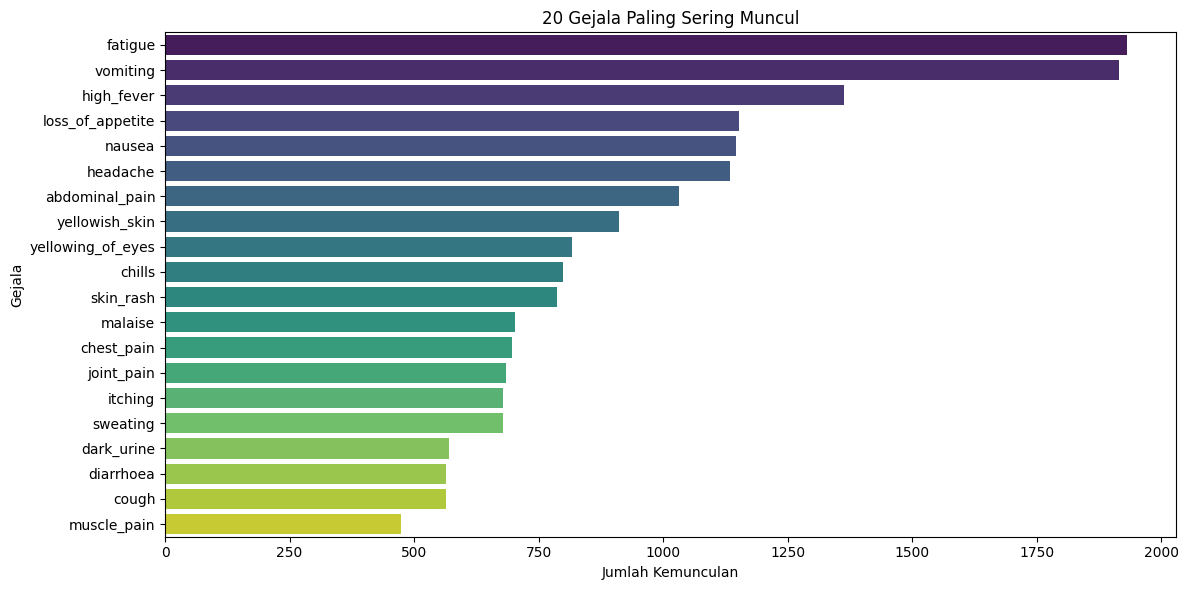

In [15]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]

all_symptoms = df[symptom_cols].values.ravel()

all_symptoms = pd.Series(all_symptoms).dropna().astype(str).str.strip().str.lower().str.replace(' ', '_')

symptom_counts = all_symptoms.value_counts().head(20)  

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette="viridis")
plt.title('20 Gejala Paling Sering Muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Gejala')
plt.tight_layout()
plt.show()

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\2303506419.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')


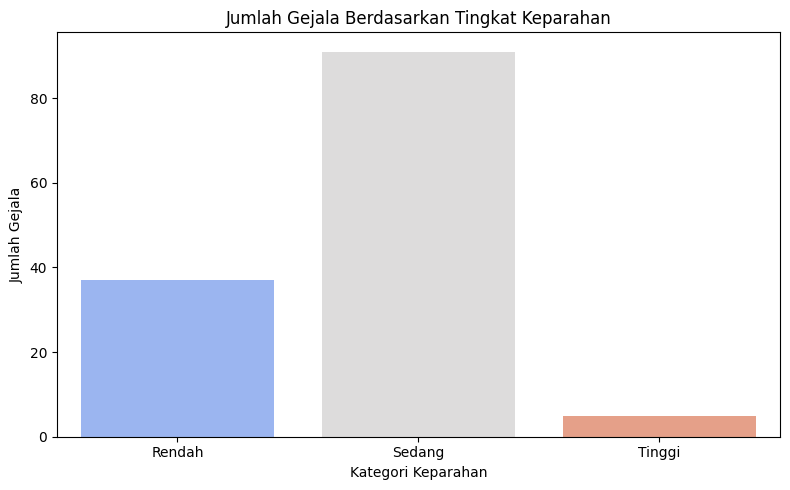

In [16]:
symptom_severity.columns = symptom_severity.columns.str.strip().str.lower()

def map_severity(weight):
    if weight <= 3:
        return 'Rendah'
    elif 4 <= weight <= 6:
        return 'Sedang'
    else:
        return 'Tinggi'

symptom_severity['kategori_keparahan'] = symptom_severity['weight'].apply(map_severity)

# Hitung jumlah gejala untuk setiap kategori
severity_counts = symptom_severity['kategori_keparahan'].value_counts().reindex(['Rendah', 'Sedang', 'Tinggi'])

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
plt.title('Jumlah Gejala Berdasarkan Tingkat Keparahan')
plt.xlabel('Kategori Keparahan')
plt.ylabel('Jumlah Gejala')
plt.tight_layout()
plt.show()

Jumlah nilai yang hilang di setiap kolom kategorikal:
 - Symptom_4: 348 nilai hilang
 - Symptom_5: 1206 nilai hilang
 - Symptom_6: 1986 nilai hilang
 - Symptom_7: 2652 nilai hilang
 - Symptom_8: 2976 nilai hilang
 - Symptom_9: 3228 nilai hilang
 - Symptom_10: 3408 nilai hilang
 - Symptom_11: 3726 nilai hilang
 - Symptom_12: 4176 nilai hilang
 - Symptom_13: 4416 nilai hilang
 - Symptom_14: 4614 nilai hilang
 - Symptom_15: 4680 nilai hilang
 - Symptom_16: 4728 nilai hilang
 - Symptom_17: 4848 nilai hilang


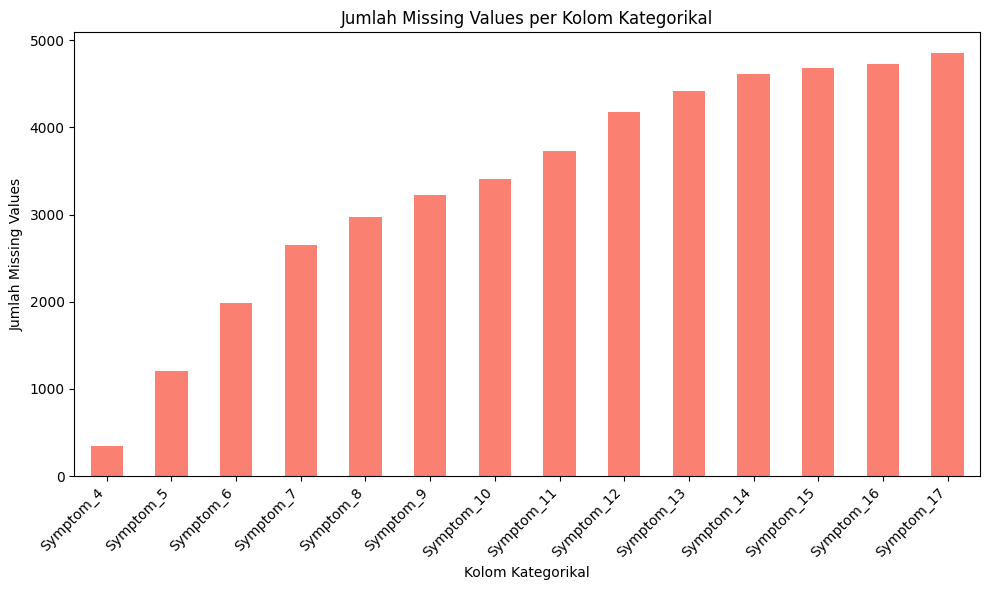


Persentase nilai yang hilang di kolom kategorikal:
 - Symptom_4: 7.07%
   >>> Symptom_4 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_5: 24.51%
   >>> Symptom_5 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_6: 40.37%
   >>> Symptom_6 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_7: 53.90%
   >>> Symptom_7 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_8: 60.49%
   >>> Symptom_8 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_9: 65.61%
   >>> Symptom_9 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.

 - Symptom_10: 69.27%
   >>> Symptom_10 memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan

In [17]:
# --- Pastikan df Anda sudah terdefinisi ---
# Misalnya, jika df Anda adalah hasil dari pd.read_csv('nama_file_anda.csv')
# df = pd.read_csv('your_dataset.csv')
# Atau jika Anda menggunakannya dari sesi sebelumnya, pastikan df ada di scope

# 1. Pilih hanya kolom dengan tipe data 'object' (kategorikal)
categorical_columns = df.select_dtypes(include='object')

# 2. Hitung jumlah missing values untuk setiap kolom kategorikal
#    Ini akan menghasilkan Pandas Series
missing_values_categorical = categorical_columns.isnull().sum()

# Filter hanya kolom yang benar-benar memiliki missing values agar plot lebih rapi
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

print("Jumlah nilai yang hilang di setiap kolom kategorikal:")
if not missing_values_categorical.empty:
    for col, count in missing_values_categorical.items():
        print(f" - {col}: {count} nilai hilang")
else:
    print("Tidak ada nilai hilang di kolom kategorikal.")

# --- Visualisasi Missing Values Kategorikal ---
if not missing_values_categorical.empty:
    plt.figure(figsize=(10, 6)) # Ukuran figure disesuaikan
    # Gunakan .plot(kind="bar") pada Pandas Series langsung
    missing_values_categorical.plot(kind="bar", color="salmon")
    plt.title("Jumlah Missing Values per Kolom Kategorikal")
    plt.ylabel("Jumlah Missing Values")
    plt.xlabel("Kolom Kategorikal")
    plt.xticks(rotation=45, ha='right') # Rotasi dan alignment agar nama kolom tidak tumpang tindih
    plt.tight_layout() # Menyesuaikan layout agar semua label terlihat
    plt.show()
else:
    print("\nTidak ada missing values untuk divisualisasikan di kolom kategorikal.")


# --- Analisis Persentase Missing Values Kategorikal ---
total_rows = len(df) # Jumlah total baris di DataFrame asli

if not missing_values_categorical.empty:
    # Hitung persentase missing values untuk kolom kategorikal
    missing_percent_categorical = (missing_values_categorical / total_rows) * 100

    print("\nPersentase nilai yang hilang di kolom kategorikal:")
    for col in missing_percent_categorical.index:
        percent = missing_percent_categorical[col]
        print(f" - {col}: {percent:.2f}%") # Format 2 angka di belakang koma

        if percent >= 80:
            print(f"   >>> {col} memiliki lebih dari 80% nilai kosong. Menghapus kolom ini mungkin lebih baik daripada imputasi.\n")
        else: # Termasuk 0% missing, atau di bawah 80%
            print(f"   >>> {col} memiliki kurang dari 80% nilai kosong. Pertimbangkan untuk mengisi nilai atau melakukan imputasi.\n")
else:
    print("\nTidak ada kolom kategorikal dengan nilai yang hilang untuk dianalisis persentasenya.")

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


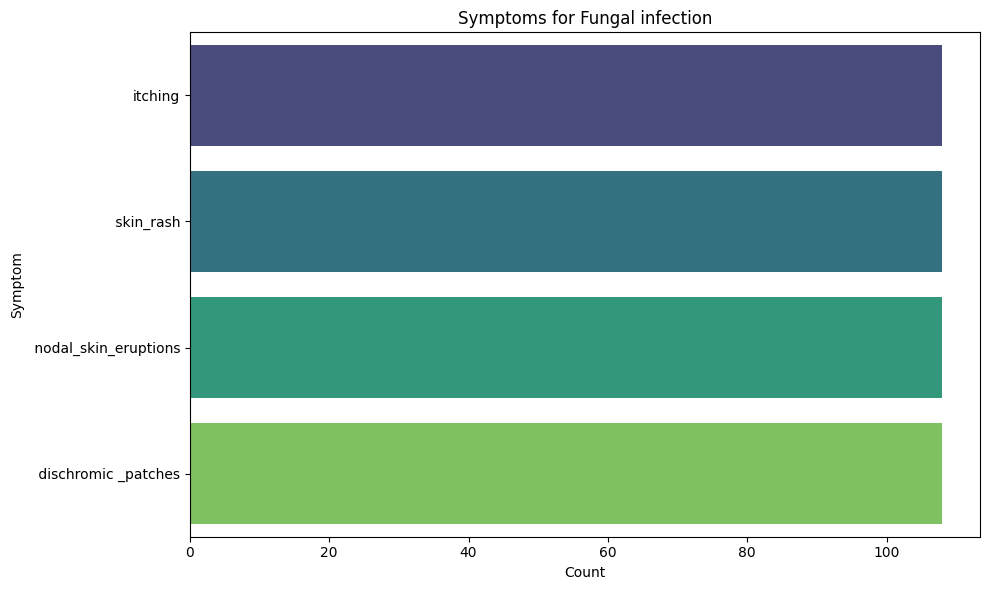

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


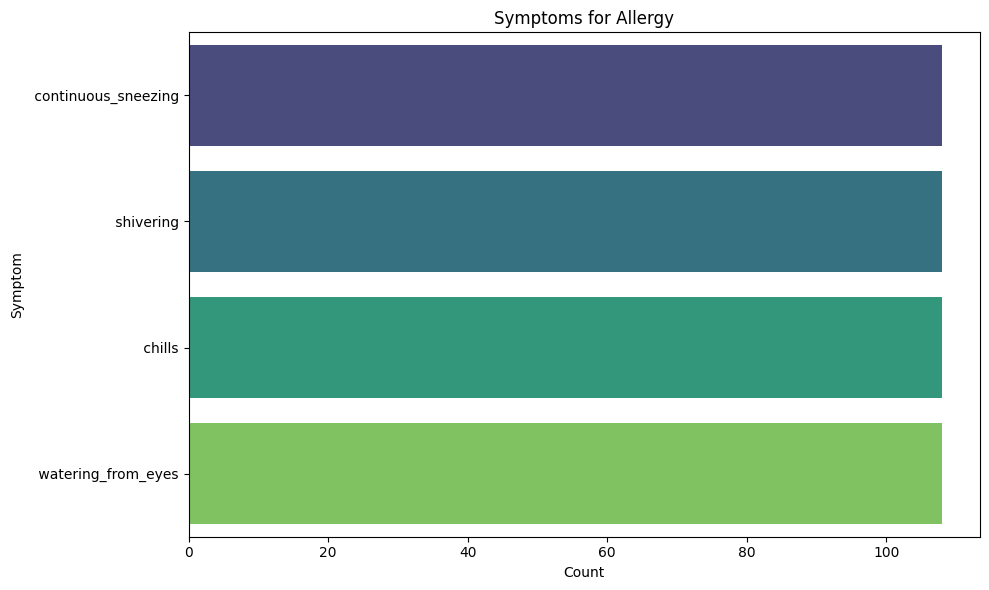

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


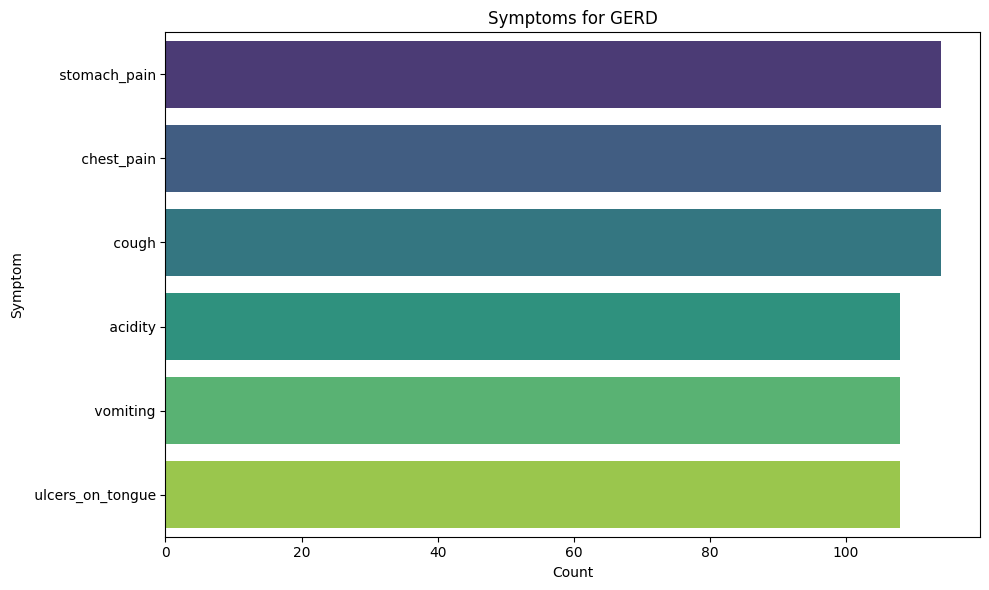

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


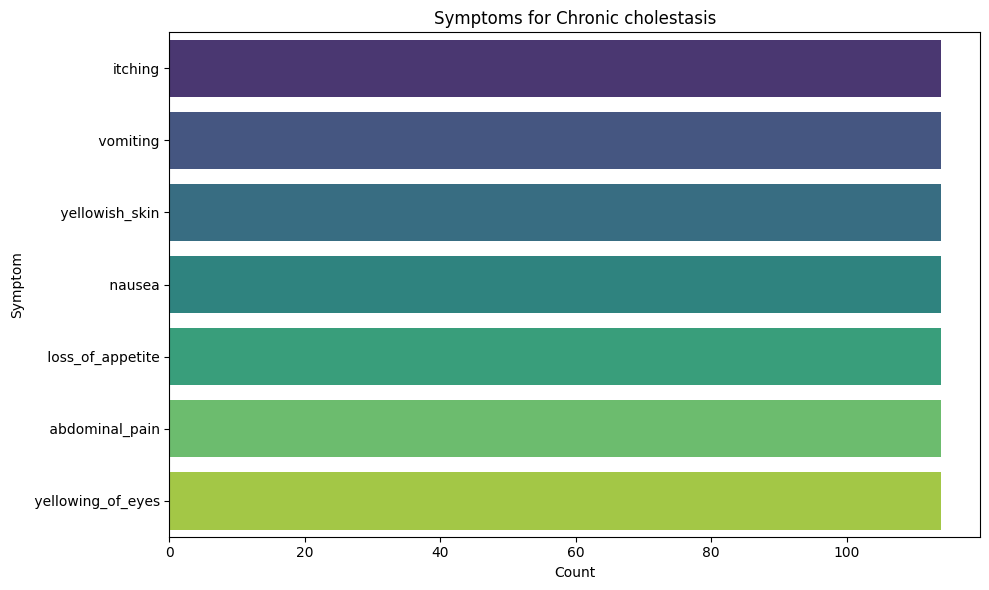

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


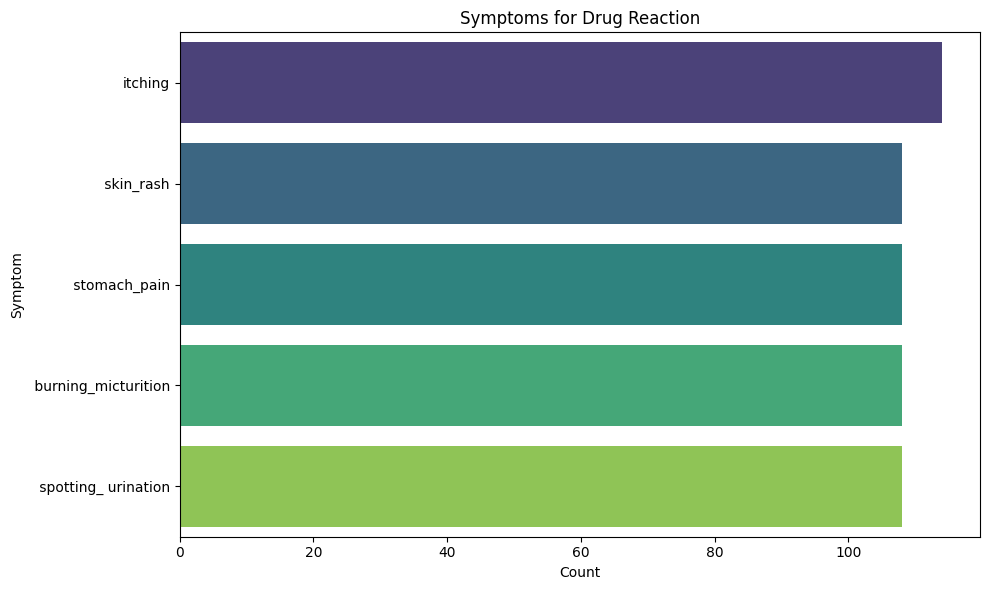

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


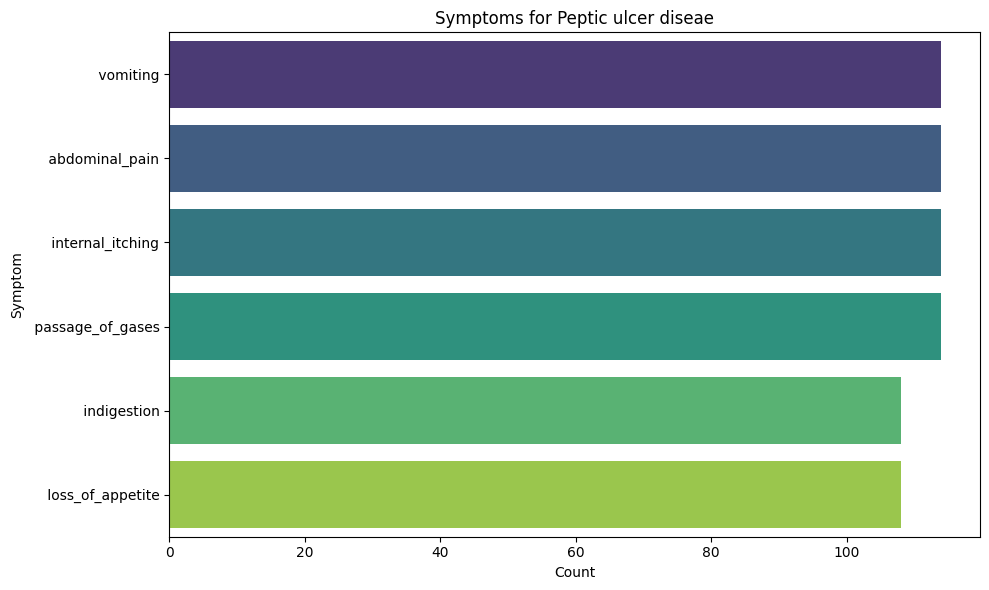

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


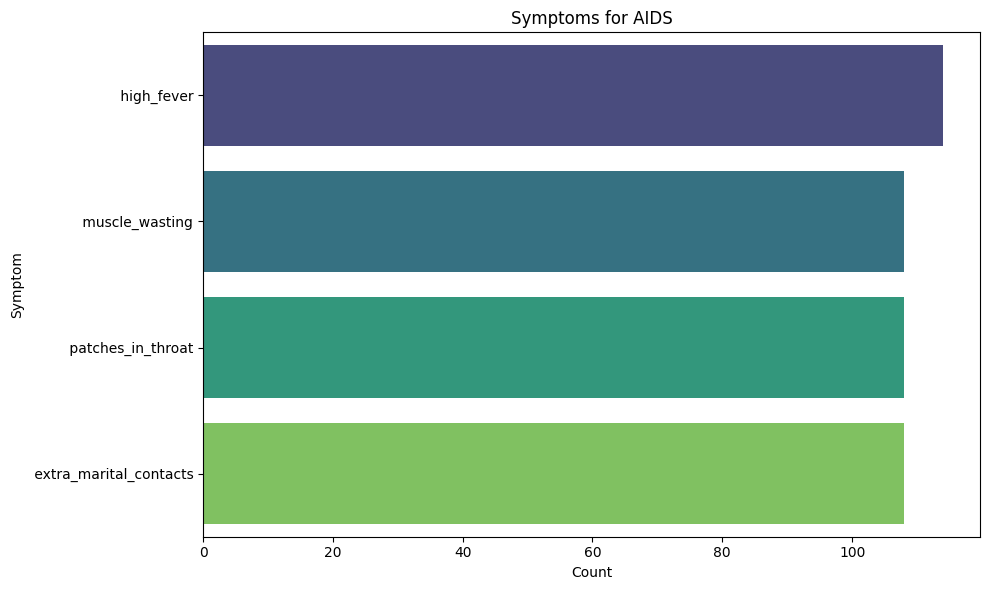

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


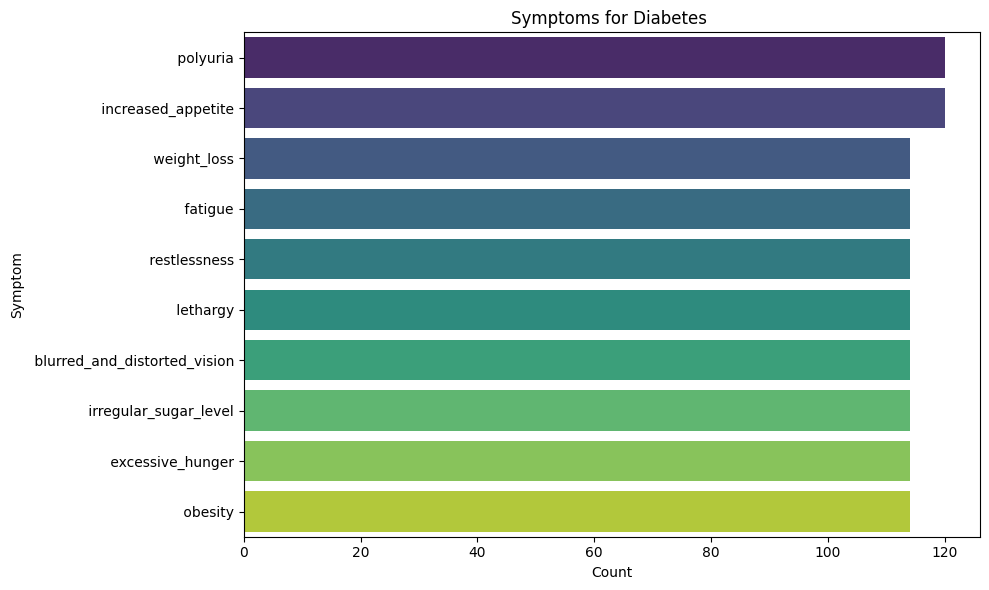

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


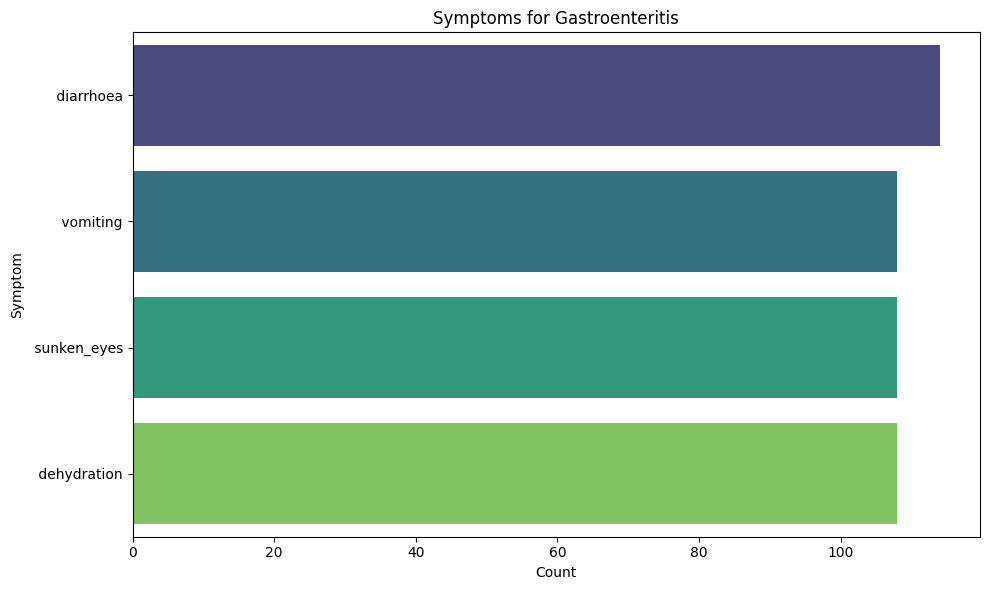

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


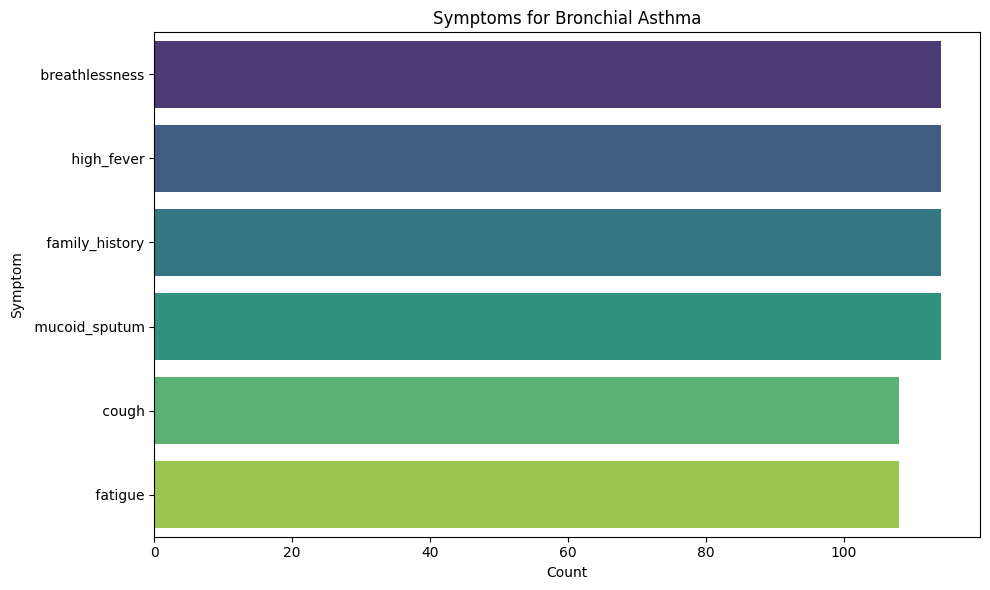

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


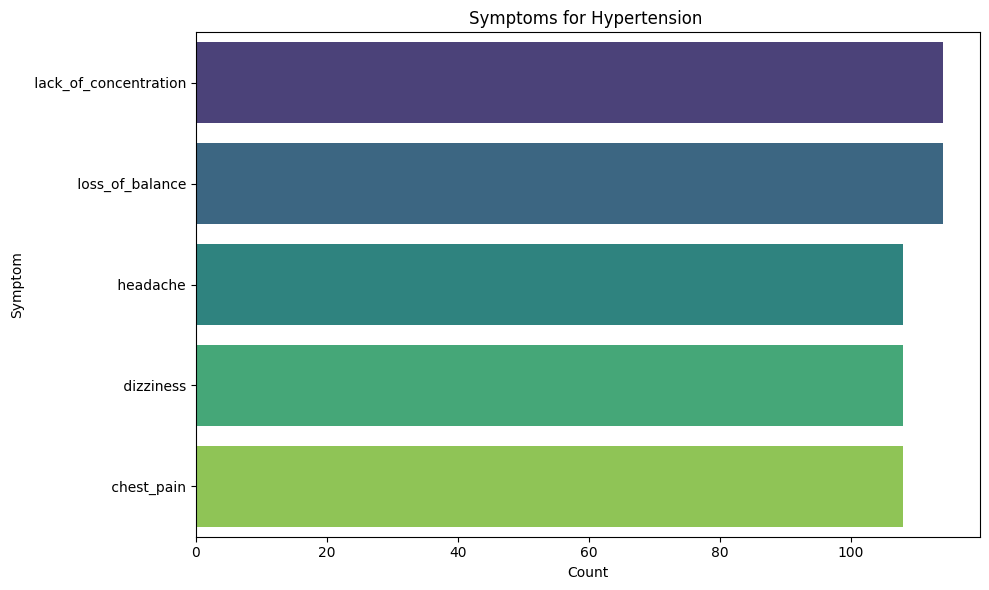

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


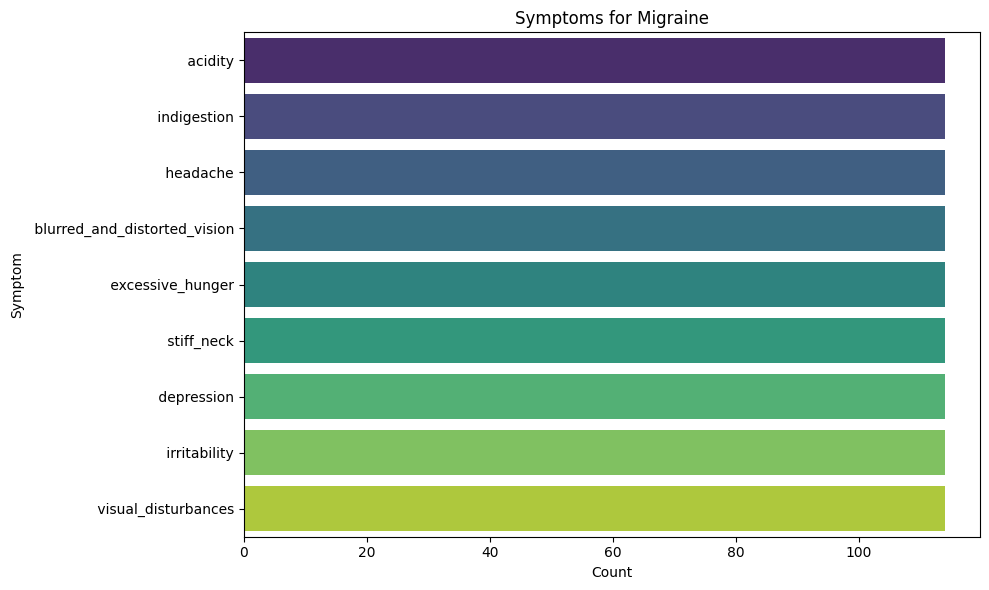

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


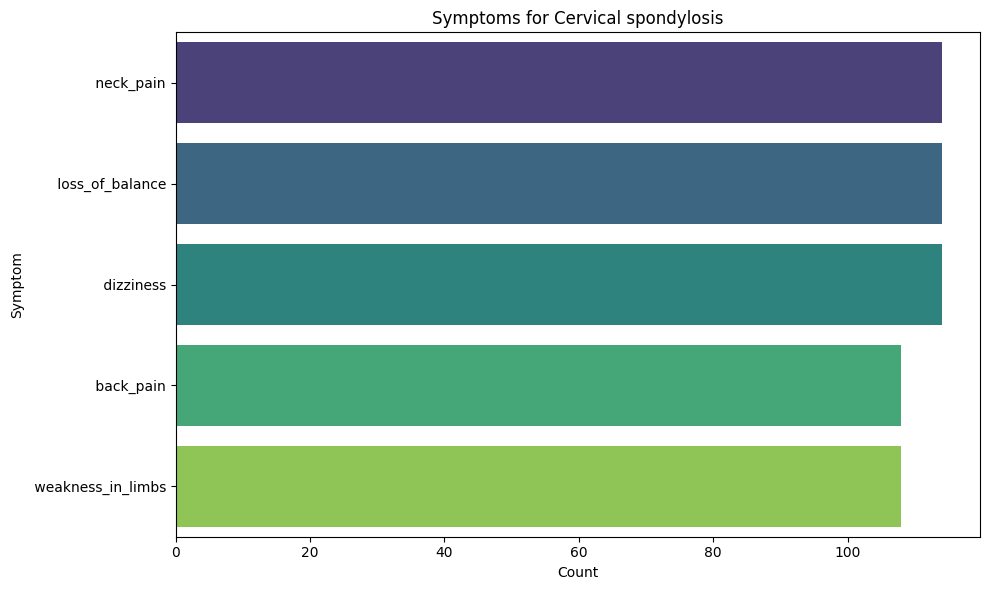

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


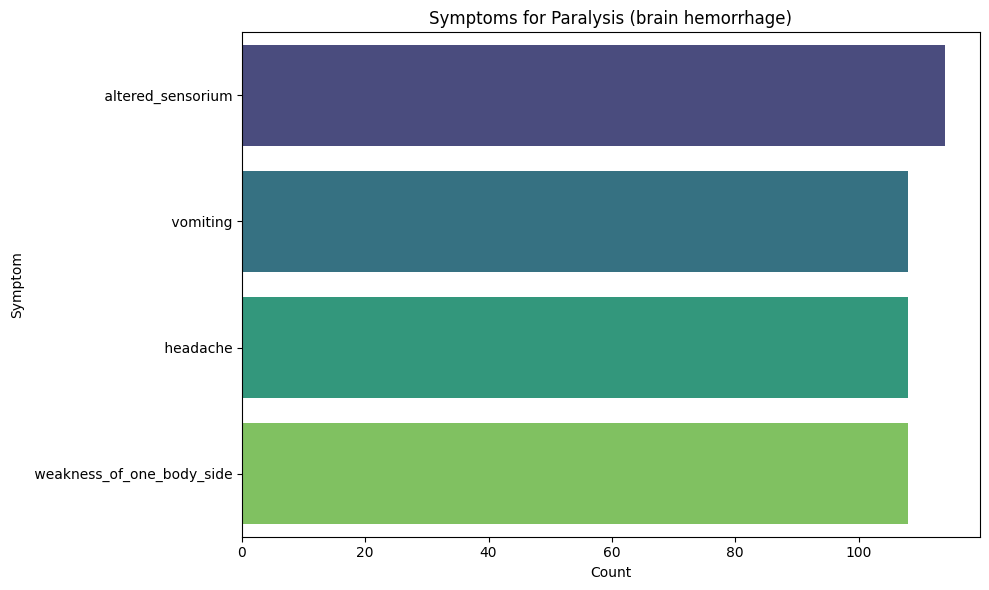

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


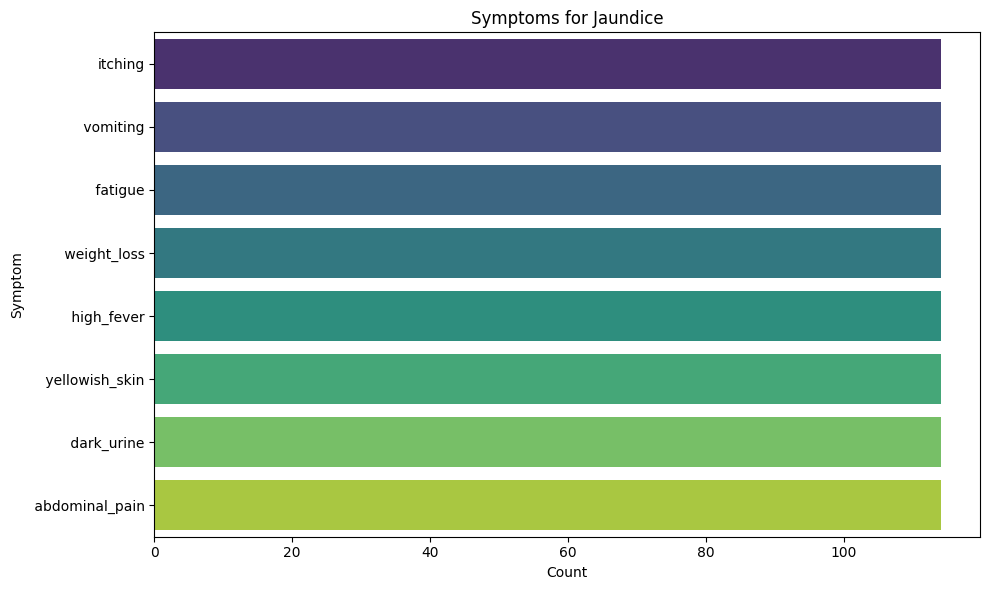

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


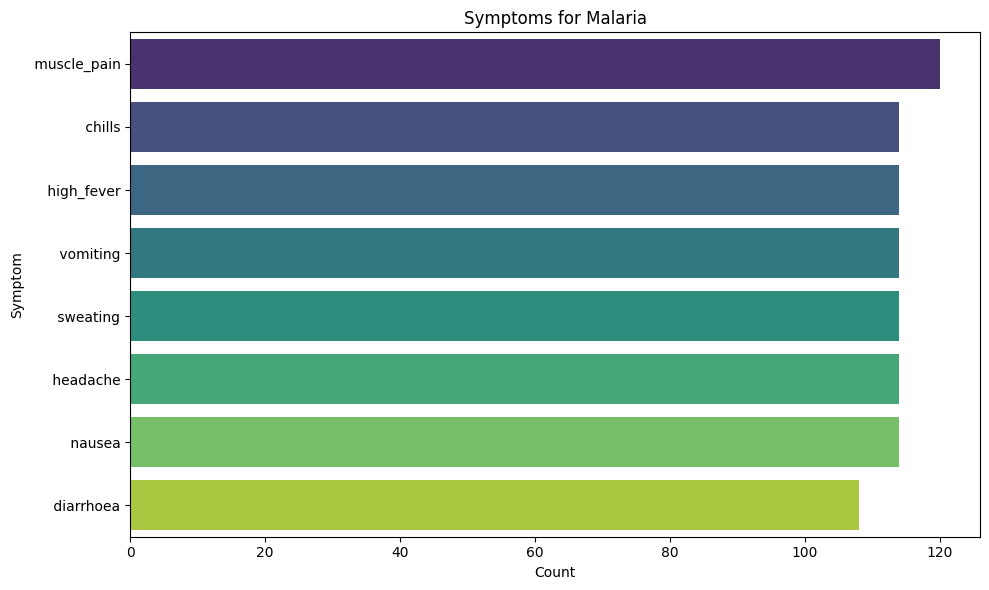

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


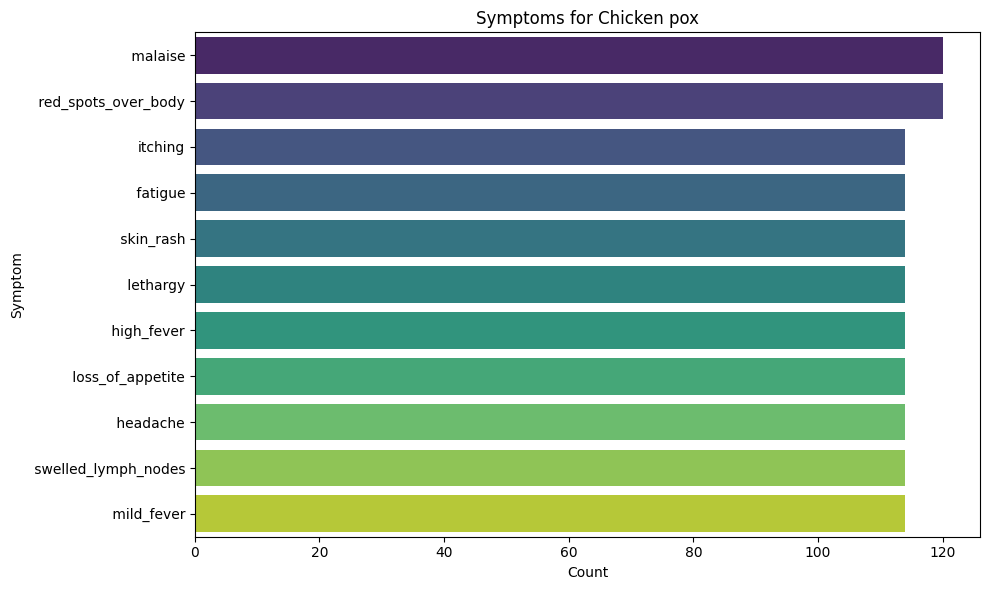

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


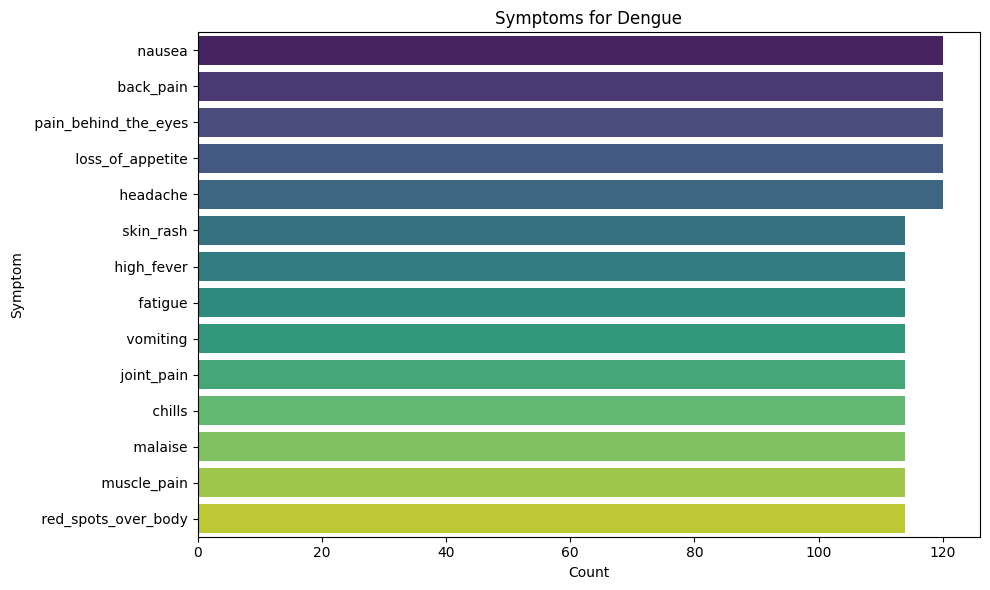

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


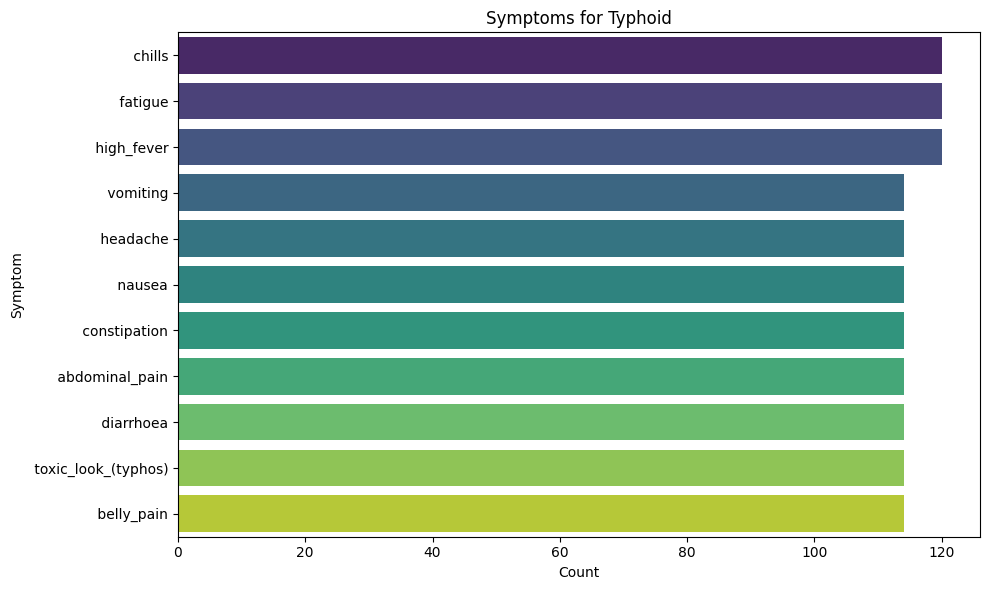

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


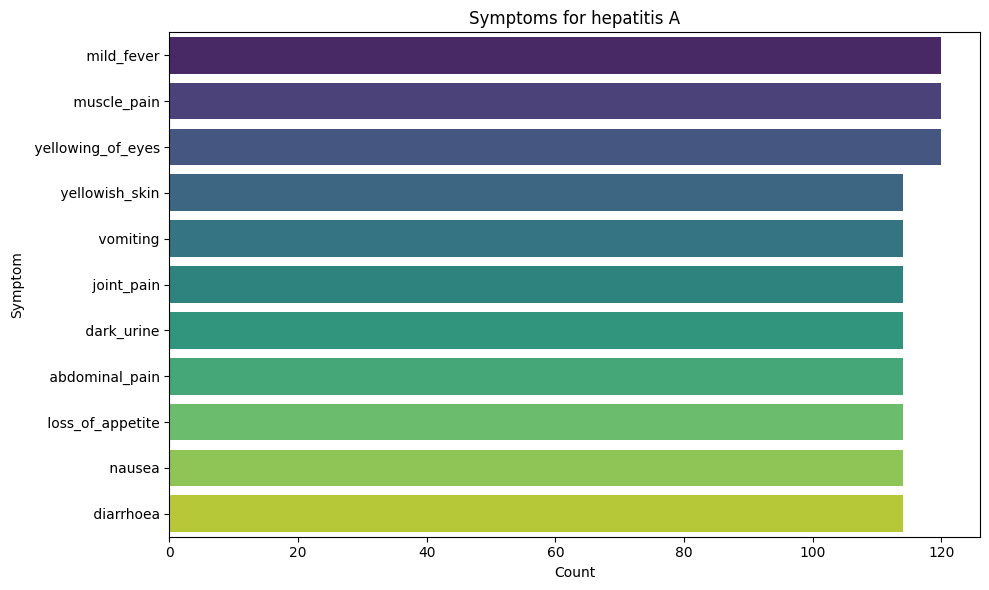

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


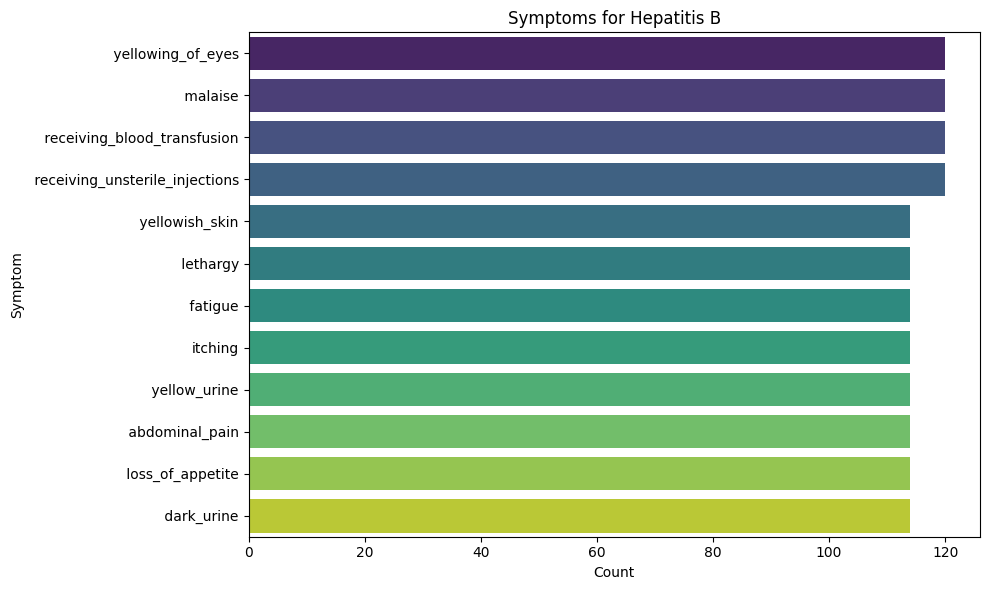

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


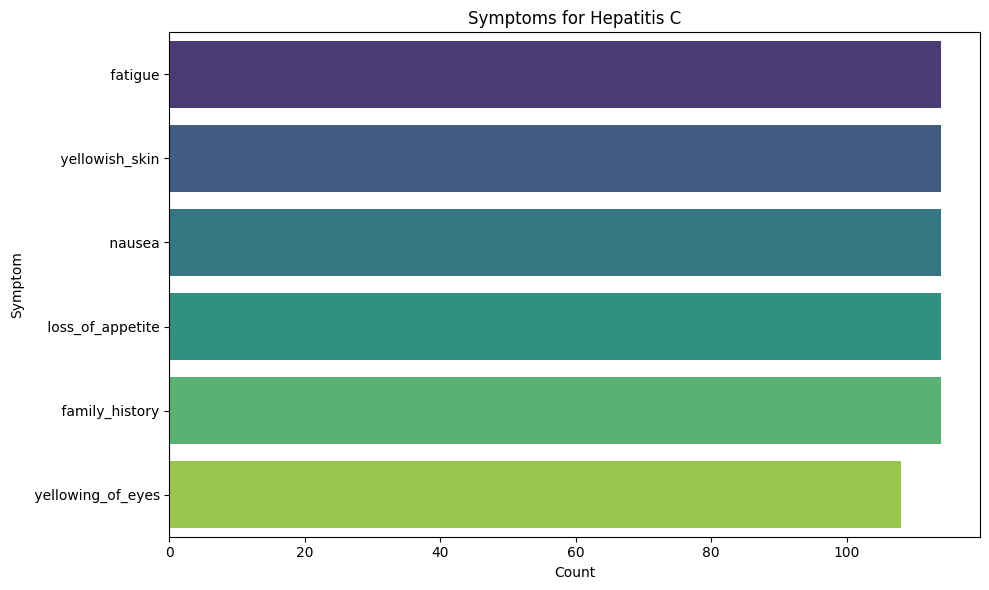

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


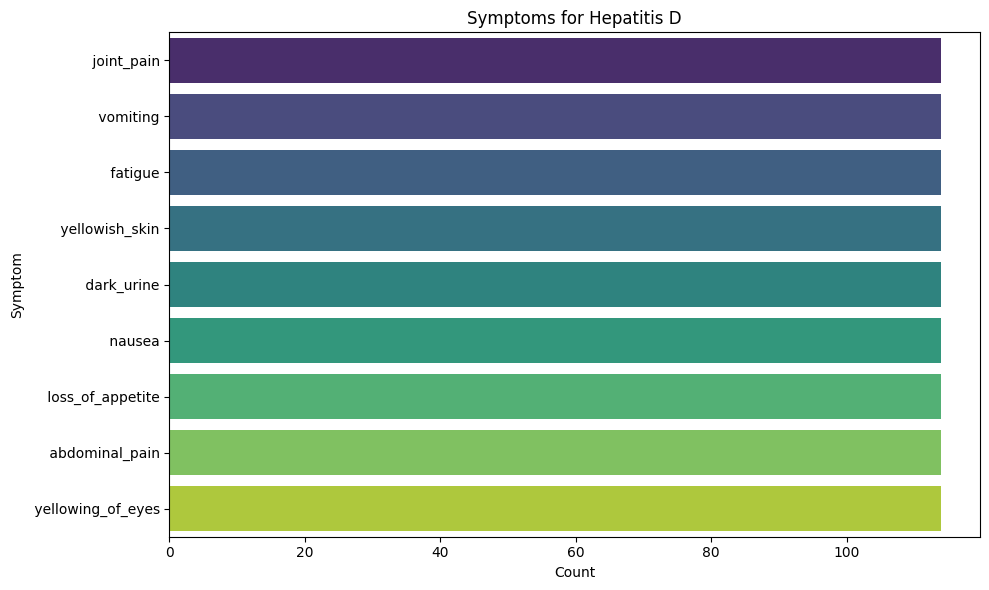

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


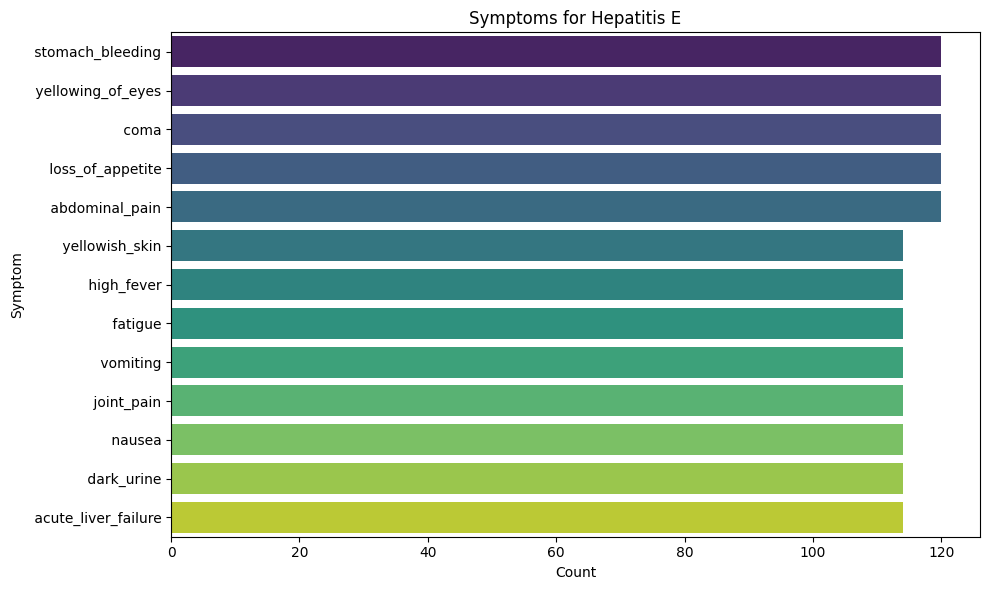

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


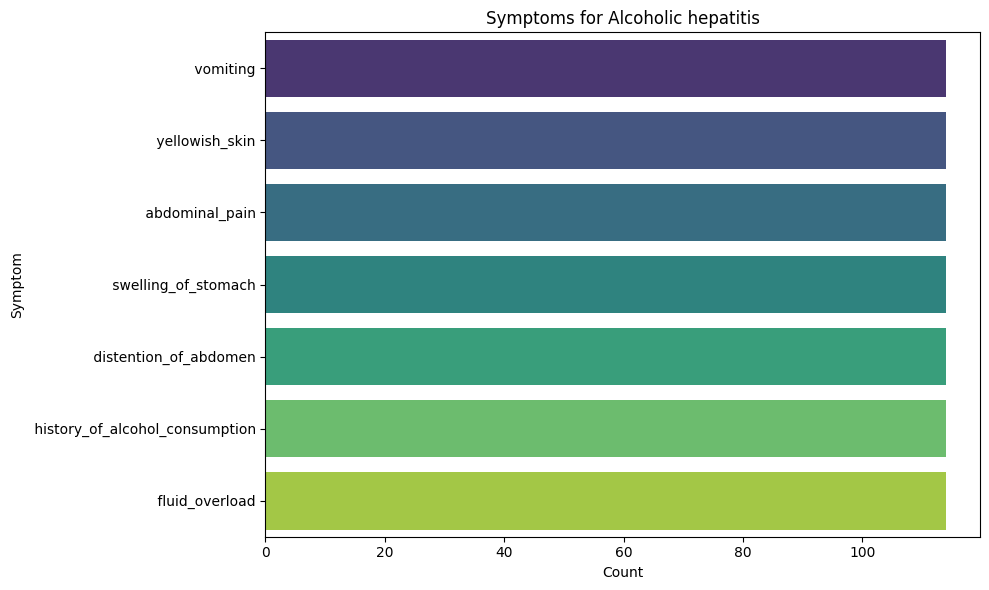

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


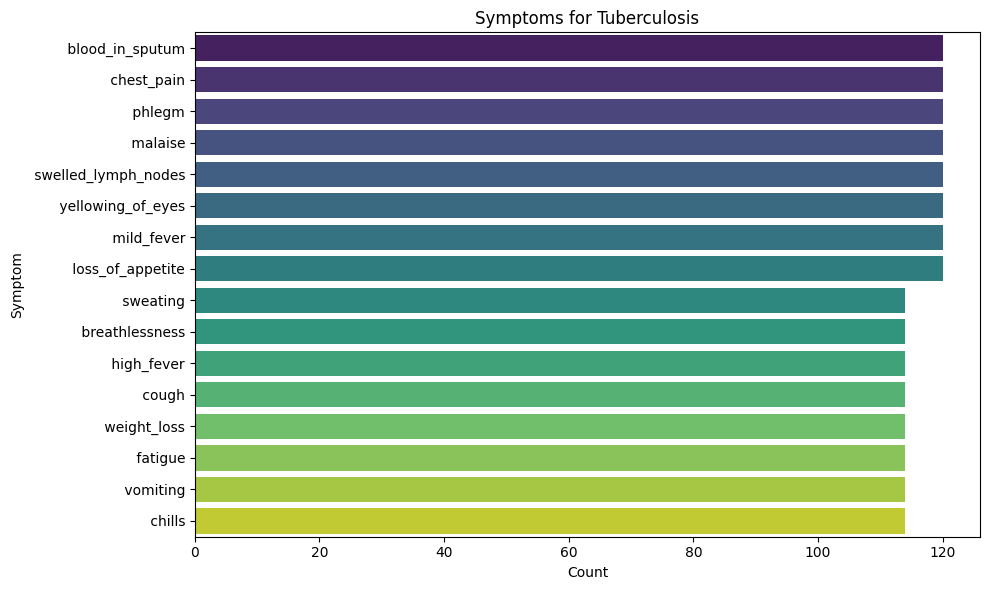

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


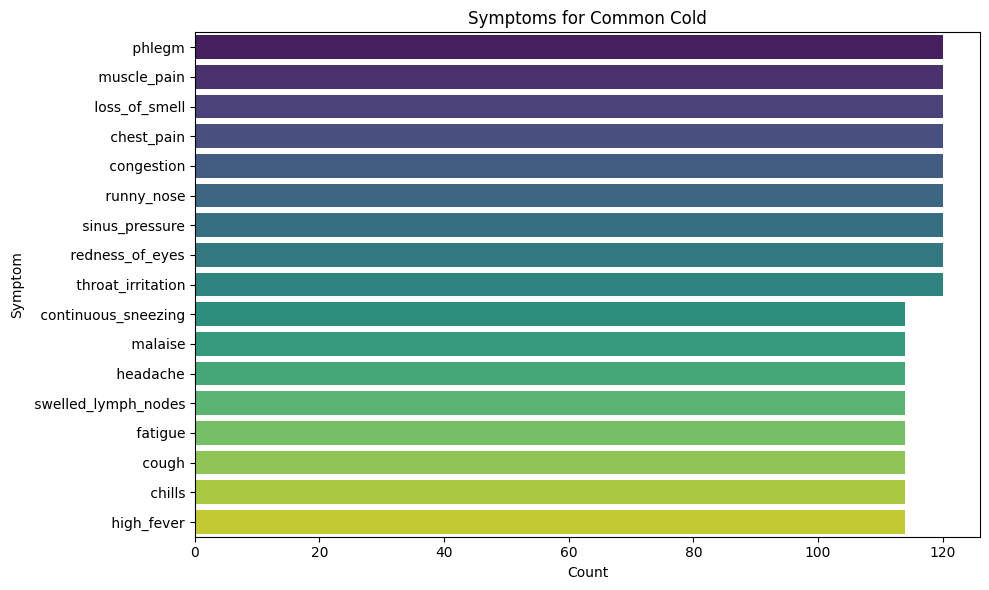

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


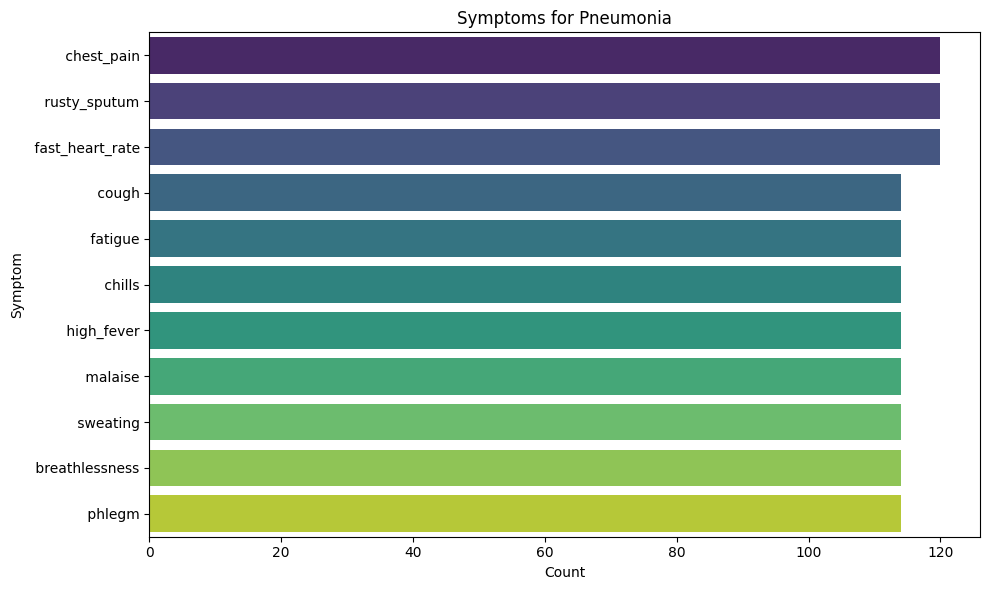

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


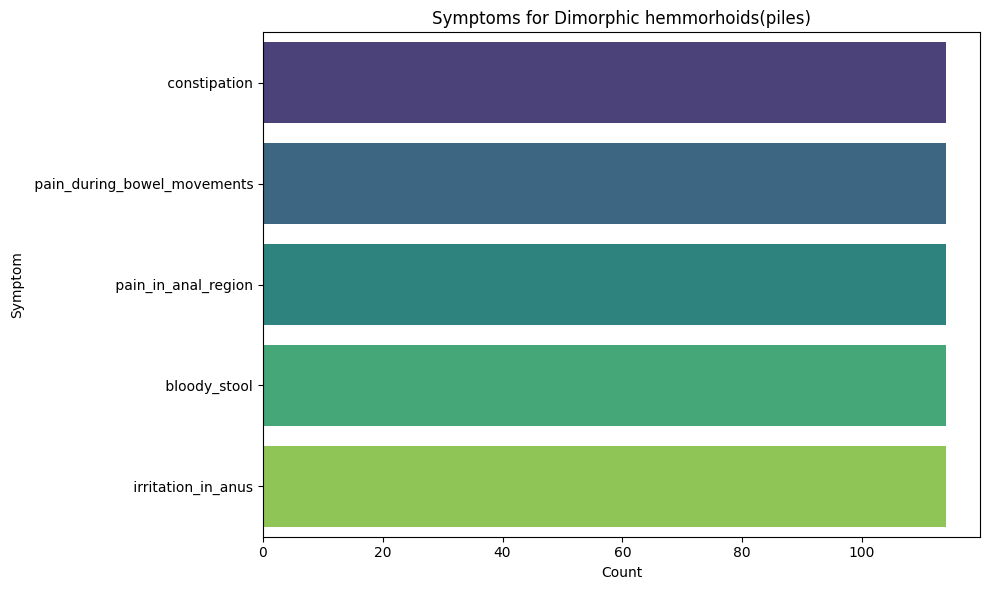

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


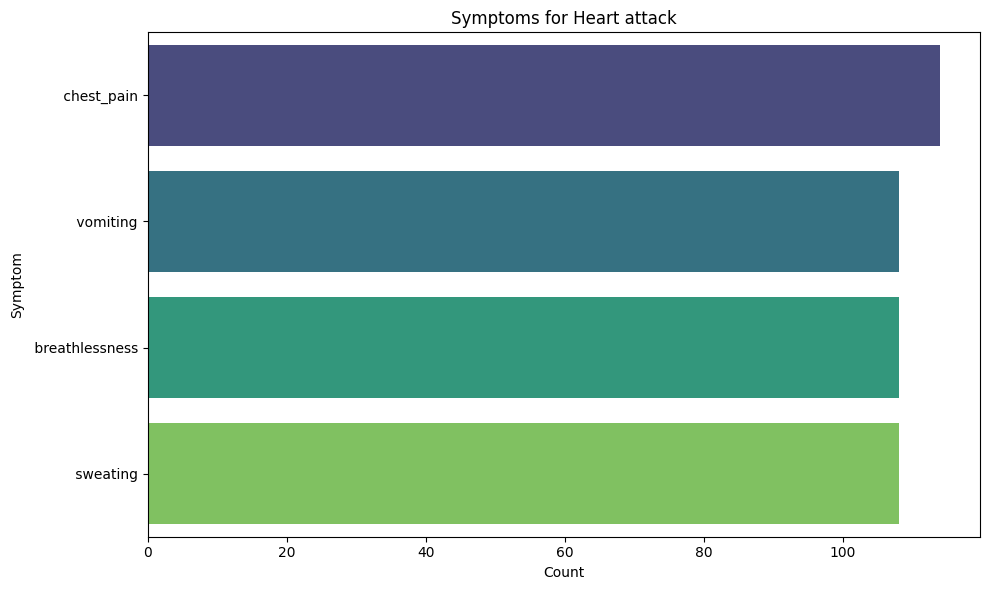

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


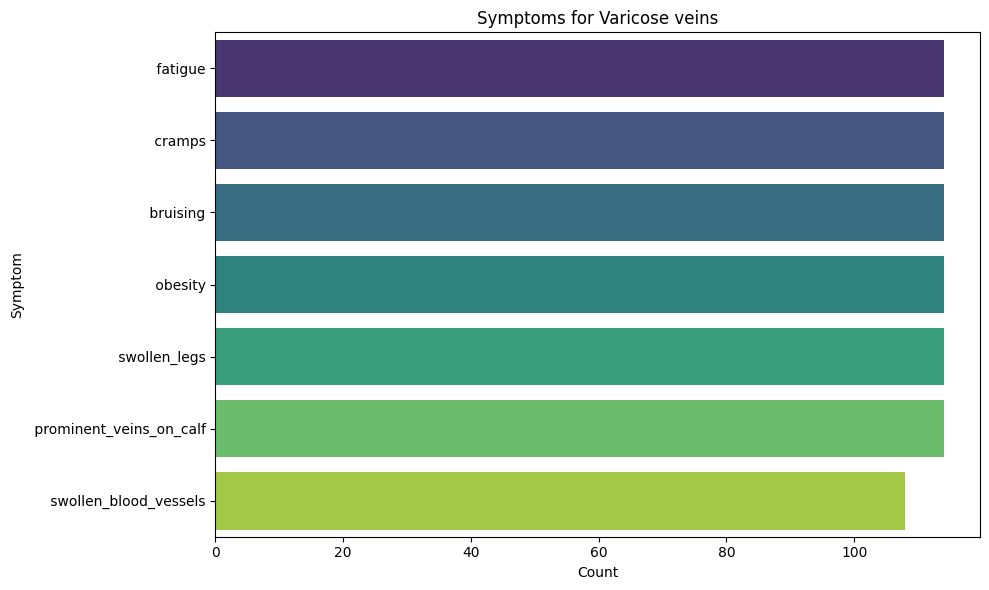

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


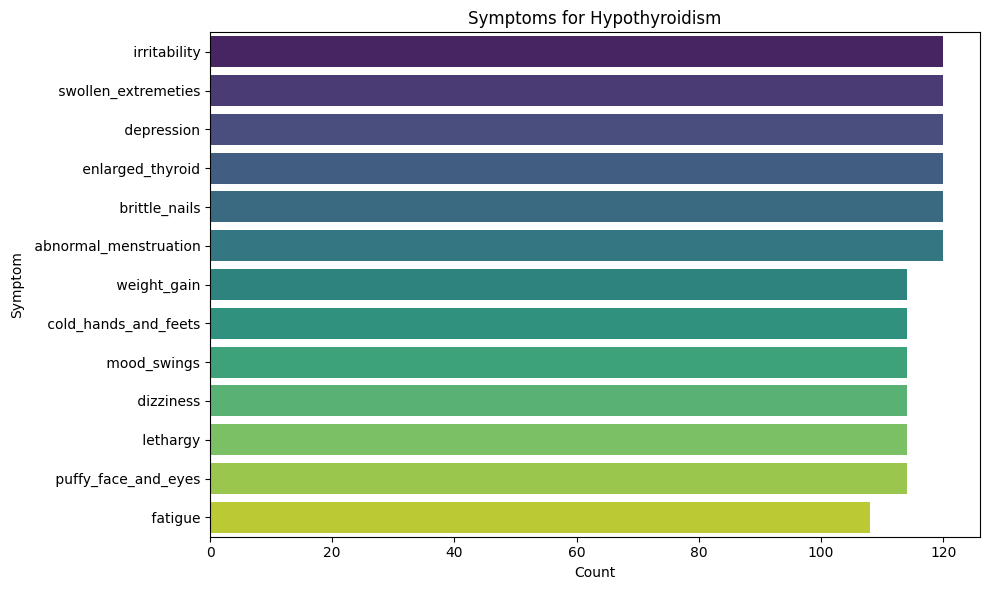

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


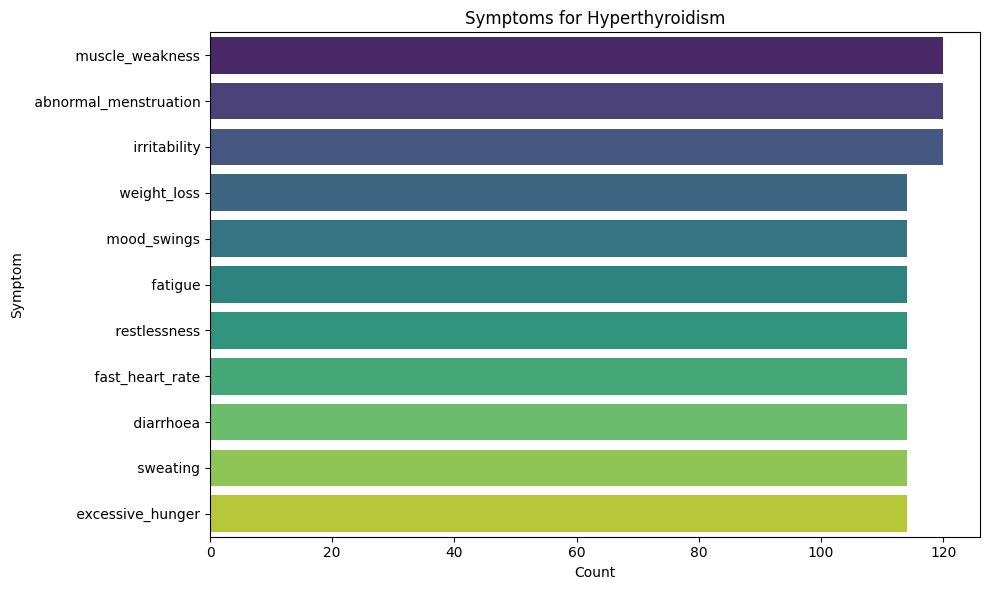

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


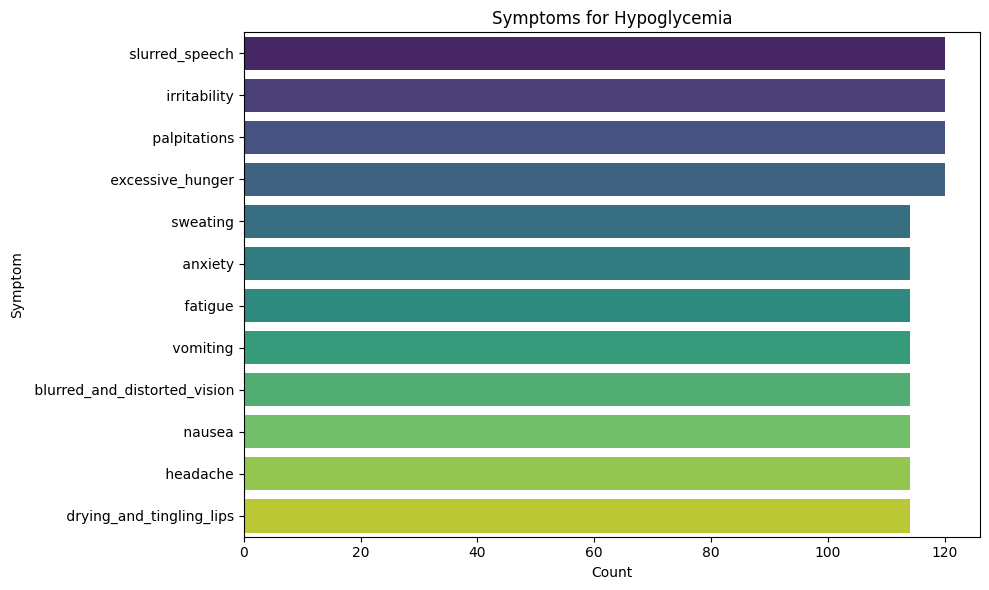

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


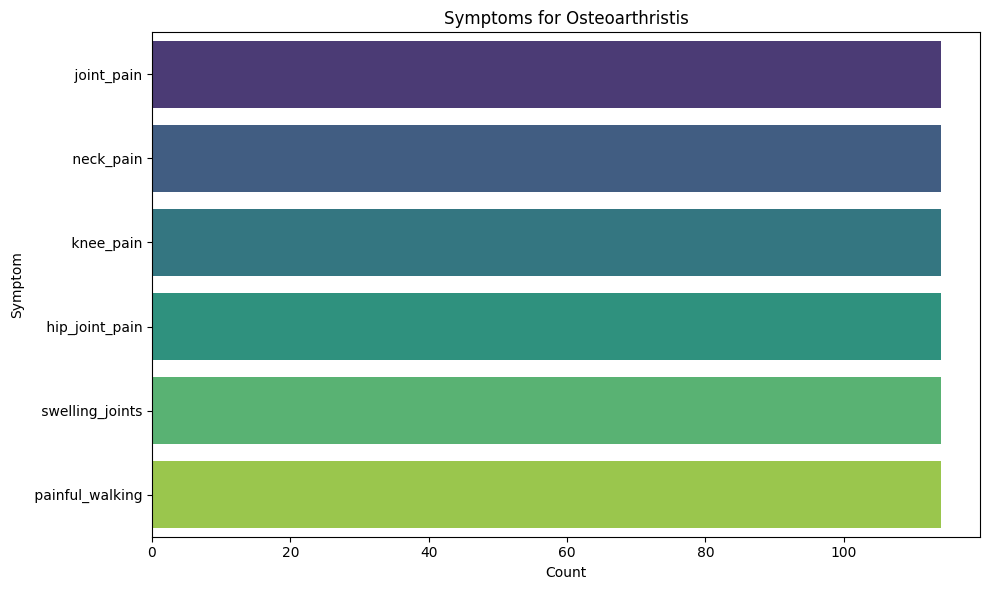

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


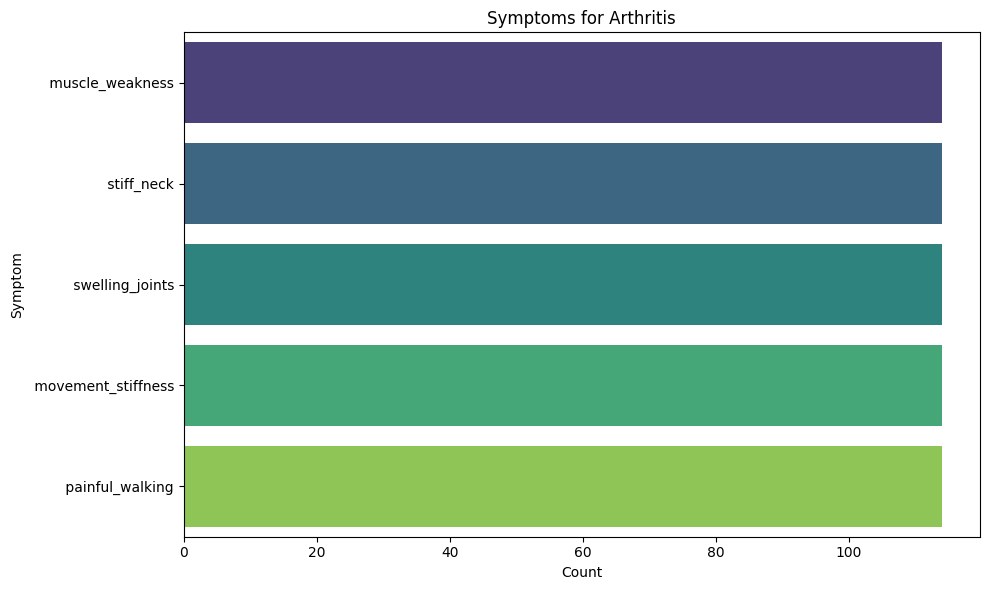

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


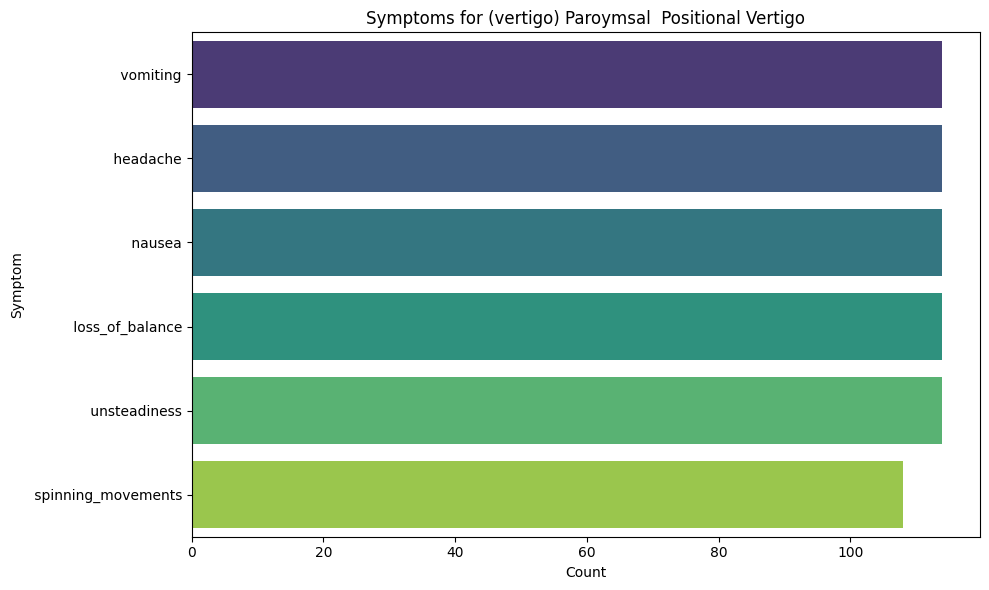

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


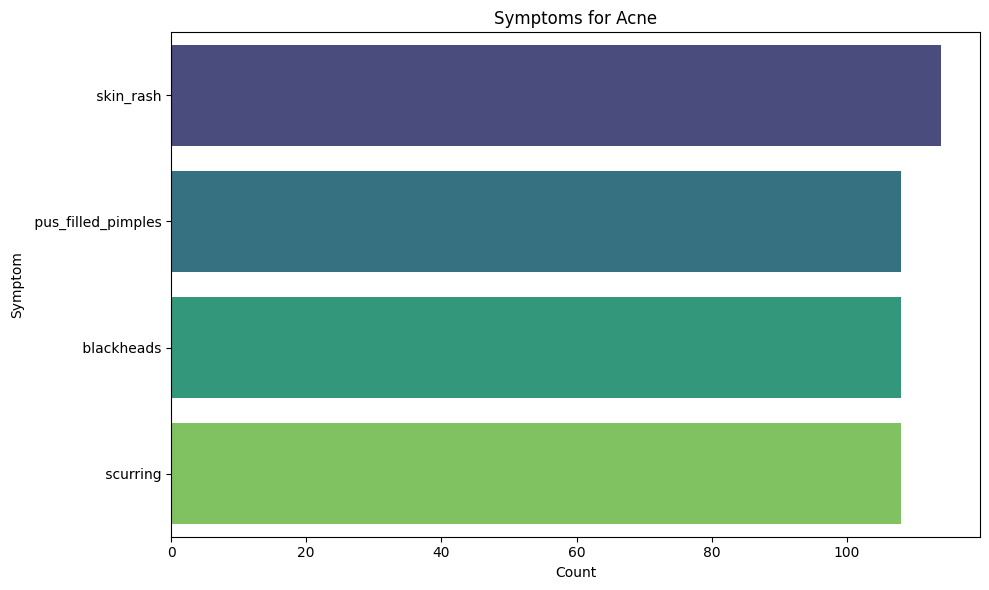

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


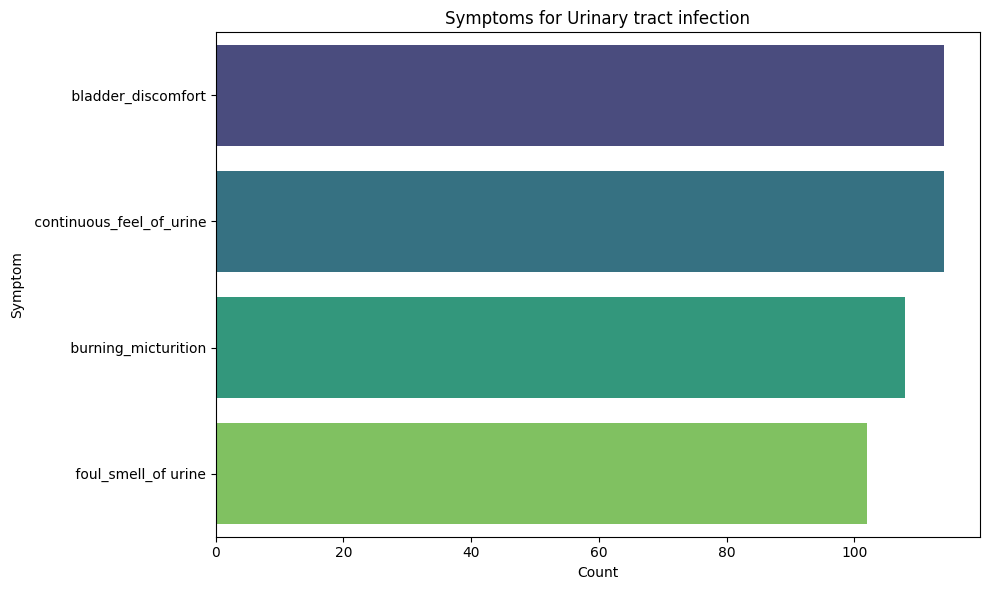

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


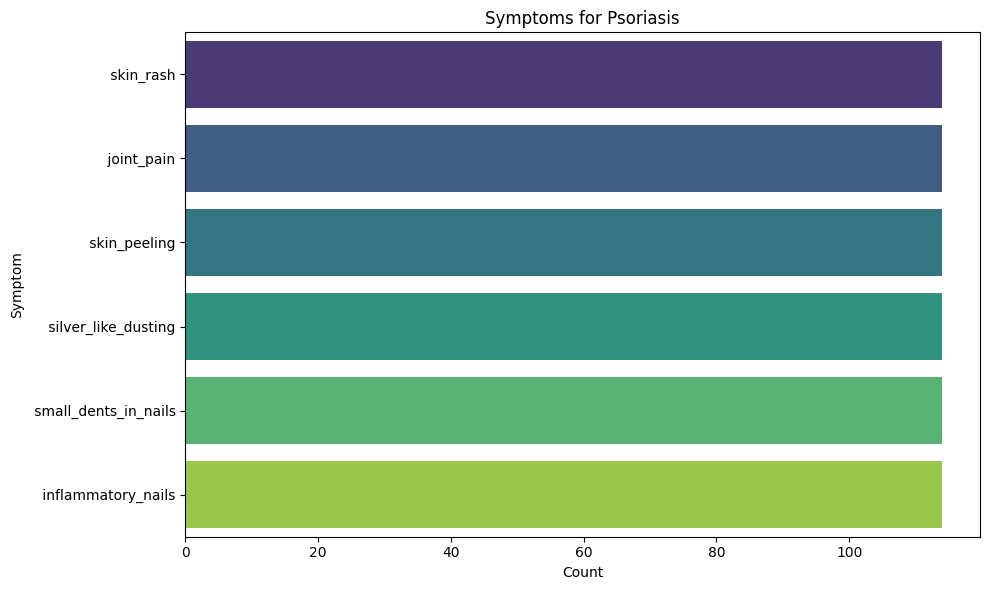

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1584647397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')


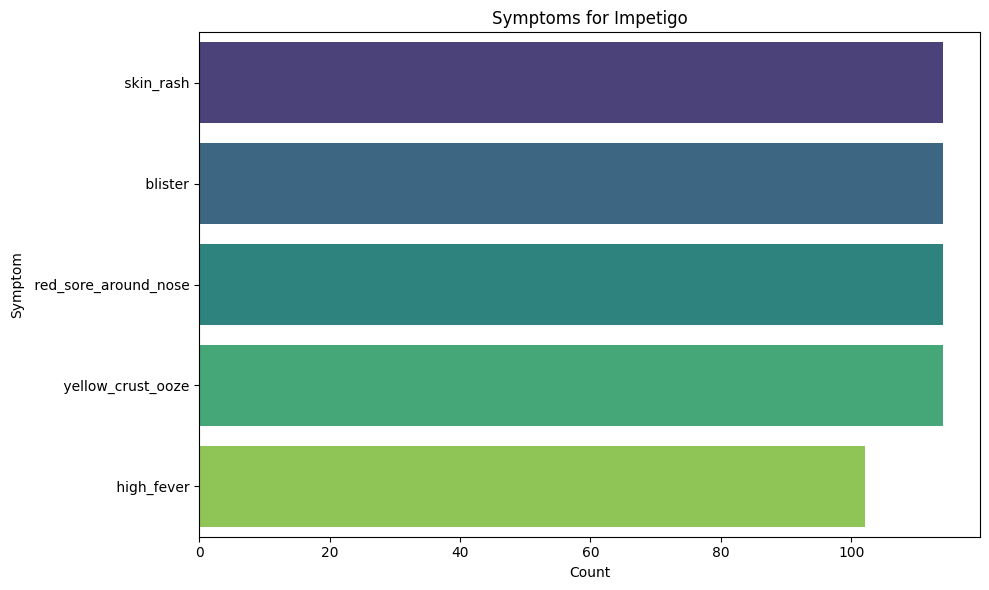

In [18]:
# Membaca file CSV ke dalam DataFrame
df = pd.read_csv('dataset.csv')

# Mendapatkan nama penyakit unik
unique_diseases = df['Disease'].unique()

# Mengidentifikasi kolom gejala
symptom_columns = [col for col in df.columns if 'Symptom' in col]

# Melakukan perulangan untuk setiap penyakit unik dan membuat plot
for disease_name in unique_diseases:
    # Memfilter data untuk penyakit saat ini
    disease_df = df[df['Disease'] == disease_name]

    # Mengubah DataFrame untuk mengubah kolom gejala menjadi baris
    # Menghilangkan baris di mana 'value' (gejala) adalah NaN setelah diubah.
    disease_symptoms = disease_df[symptom_columns].melt(var_name='Symptom_Column', value_name='Symptom_Name').dropna(subset=['Symptom_Name'])

    # Menghitung kemunculan setiap gejala
    symptom_counts = disease_symptoms['Symptom_Name'].value_counts().reset_index()
    symptom_counts.columns = ['Symptom', 'Count']

    # Mengurutkan untuk visualisasi yang lebih baik
    symptom_counts = symptom_counts.sort_values(by='Count', ascending=False)

    # Membuat plot bar untuk gejala penyakit saat ini
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Symptom', data=symptom_counts, palette='viridis')
    plt.title(f'Symptoms for {disease_name}')
    plt.xlabel('Count')
    plt.ylabel('Symptom')
    plt.tight_layout()
    plt.show()

In [19]:
symptom_precaution['Disease'] = symptom_precaution['Disease'].str.strip().str.lower()
symptom_desc['Disease'] = symptom_desc['Disease'].str.strip().str.lower()

df_combined = symptom_desc.merge(symptom_precaution, on='Disease', how='outer')

df_combined.head()

,Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,(vertigo) paroymsal positional vertigo,Benign paroxysmal positional vertigo (BPPV) is...,lie down,avoid sudden change in body,avoid abrupt head movment,relax
1,acne,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products
2,aids,Acquired immunodeficiency syndrome (AIDS) is a...,avoid open cuts,wear ppe if possible,consult doctor,follow up
3,alcoholic hepatitis,"Alcoholic hepatitis is a diseased, inflammator...",stop alcohol consumption,consult doctor,medication,follow up
4,allergy,An allergy is an immune system response to a f...,apply calamine,cover area with bandage,NaN,use ice to compress itching


## DROP COLUMN

In [20]:
df.drop(['Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'], inplace=True,axis=1)

In [21]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
dtypes: object(12)
memory usage: 461.4+ KB


In [23]:
kolom = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11']
for i in kolom:
    df[i].fillna('Unknown', inplace=True)

C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\1440100058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('Unknown', inplace=True)


In [24]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,Fungal infection,itching,skin_rash,dischromic _patches,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [25]:
symptom_cols = [col for col in df.columns if 'Symptom' in col]
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '_')

def calculate_weighted_symptoms(row):
    symptoms = [s for s in row[symptom_cols] if pd.notna(s) and s != 'nan']
    weights = symptom_severity.set_index('symptom').to_dict()['weight']
    return sum(weights.get(symptom, 0) for symptom in symptoms)

df['severity_score'] = df.apply(calculate_weighted_symptoms, axis=1)

df[['Disease', 'severity_score']].head()

,Disease,severity_score
0,Fungal infection,8
1,Fungal infection,7
2,Fungal infection,5
3,Fungal infection,4
4,Fungal infection,8


C:\Users\Mellafesa\AppData\Local\Temp\ipykernel_20100\882054483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')


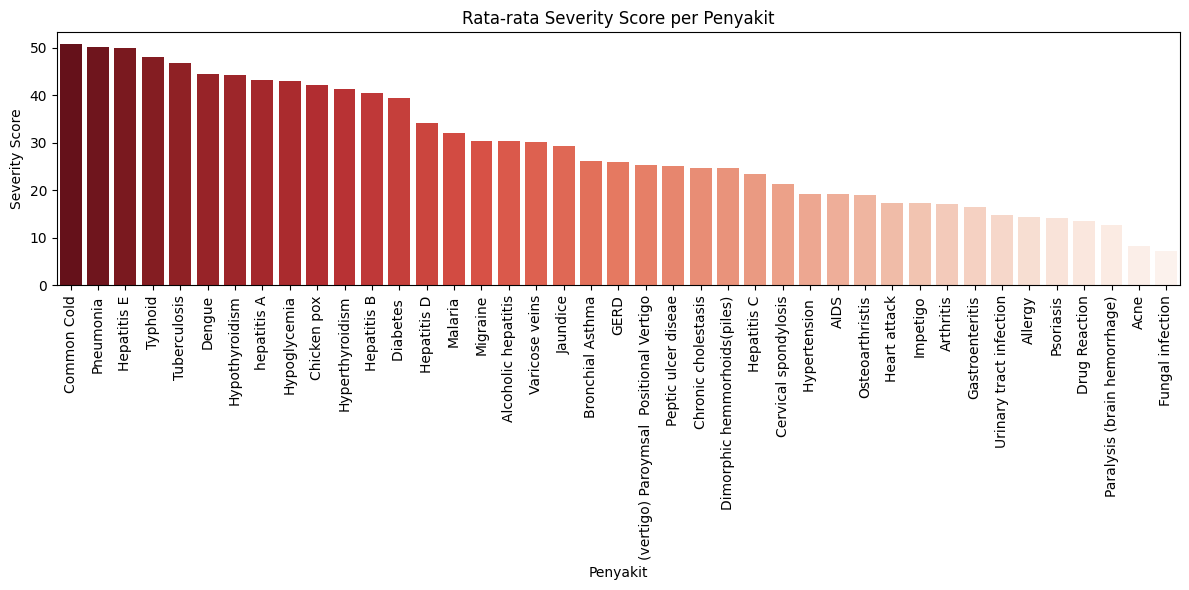

In [26]:
severity_by_disease = df.groupby('Disease')['severity_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=severity_by_disease, x='Disease', y='severity_score', palette='Reds_r')

plt.xticks(rotation=90)
plt.title('Rata-rata Severity Score per Penyakit')
plt.xlabel('Penyakit')
plt.ylabel('Severity Score')
plt.tight_layout()

plt.show()

## ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder

Disease = df['Disease'].unique()
Disease

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [28]:
len(Disease)

41

In [29]:
columns = df.columns[1:-1] 
columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11'],
      dtype='object')

In [30]:
symptoms = [s for s in pd.unique(df[columns].values.ravel()) if str(s) != 'nan']
symptoms

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'dischromic__patches',
 'unknown',
 'continuous_sneezing',
 'shivering',
 'chills',
 'watering_from_eyes',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'vomiting',
 'cough',
 'chest_pain',
 'yellowish_skin',
 'nausea',
 'loss_of_appetite',
 'abdominal_pain',
 'yellowing_of_eyes',
 'burning_micturition',
 'spotting__urination',
 'passage_of_gases',
 'internal_itching',
 'indigestion',
 'muscle_wasting',
 'patches_in_throat',
 'high_fever',
 'extra_marital_contacts',
 'fatigue',
 'weight_loss',
 'restlessness',
 'lethargy',
 'irregular_sugar_level',
 'blurred_and_distorted_vision',
 'obesity',
 'excessive_hunger',
 'increased_appetite',
 'polyuria',
 'sunken_eyes',
 'dehydration',
 'diarrhoea',
 'breathlessness',
 'family_history',
 'mucoid_sputum',
 'headache',
 'dizziness',
 'loss_of_balance',
 'lack_of_concentration',
 'stiff_neck',
 'depression',
 'irritability',
 'visual_disturbances',
 'back_pain',
 'weakness_in_limbs',
 'ne

In [31]:
columns = df.columns[1:-1] #diperlukan -1 agar "severity_score" yang bertipe integer tidak termasuk 
symptoms = [s for s in pd.unique(df[columns].values.ravel()) if str(s) != 'nan']


In [32]:
has_nan_str = any(s.lower() == 'nan' for s in symptoms)
print(has_nan_str)

False


In [33]:
label_encoder = LabelEncoder()
symp = label_encoder.fit_transform(symptoms)
symp

array([ 53,  96,  70,  30, 114,  23,  92,  18, 118, 102,   2, 113, 117,
        24,  17, 126,  68,  58,   0, 125,  16, 100,  77,  49,  47,  66,
        78,  43,  36,  39, 122,  89,  57,  50,  12,  71,  35,  46,  80,
       103,  27,  29,  13,  37,  64,  42,  32,  59,  56, 101,  28,  51,
       116,   6, 119,  69, 120,   4,  26, 104,  65,  61, 105,  60,  87,
        54,  72,  21, 112,   7, 124,  84,  85,  20,   3, 107,  31,  45,
        40,  79, 111,  88,  94,  38,  90,  73,  74,  11,  52,  25,  15,
       110, 108,  81, 121,  19,  62,  82,  34,  14, 109,  67,   1,   5,
        97,  76,  33,  55,  44, 106,  75,  63,  99, 115,  83,   8,  91,
         9,  41,  22,  95,  93,  98,  48,  10,  86, 123])

In [34]:
encodedSymp = dict(zip(symptoms, symp))
encodedSymp

{'itching': np.int64(53),
 'skin_rash': np.int64(96),
 'nodal_skin_eruptions': np.int64(70),
 'dischromic__patches': np.int64(30),
 'unknown': np.int64(114),
 'continuous_sneezing': np.int64(23),
 'shivering': np.int64(92),
 'chills': np.int64(18),
 'watering_from_eyes': np.int64(118),
 'stomach_pain': np.int64(102),
 'acidity': np.int64(2),
 'ulcers_on_tongue': np.int64(113),
 'vomiting': np.int64(117),
 'cough': np.int64(24),
 'chest_pain': np.int64(17),
 'yellowish_skin': np.int64(126),
 'nausea': np.int64(68),
 'loss_of_appetite': np.int64(58),
 'abdominal_pain': np.int64(0),
 'yellowing_of_eyes': np.int64(125),
 'burning_micturition': np.int64(16),
 'spotting__urination': np.int64(100),
 'passage_of_gases': np.int64(77),
 'internal_itching': np.int64(49),
 'indigestion': np.int64(47),
 'muscle_wasting': np.int64(66),
 'patches_in_throat': np.int64(78),
 'high_fever': np.int64(43),
 'extra_marital_contacts': np.int64(36),
 'fatigue': np.int64(39),
 'weight_loss': np.int64(122),
 'r

In [35]:
for col in columns:
    df[col] = df[col].map(encodedSymp)

In [36]:
Disease = df['Disease'].unique()
df['Disease'] = label_encoder.fit_transform(df['Disease'])

In [37]:
X = df.drop('Disease', axis=1)
y = df['Disease']

In [38]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int64

In [39]:
class_counts = y.value_counts()
print(class_counts)

Disease
15    120
4     120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
40    120
19    120
20    120
21    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
27    120
Name: count, dtype: int64


In [40]:
# y = to_categorical(y, num_classes=len(df['Disease'].unique())) -> cb ini kan termasuk onehot, jd jan dipake deh, soalnya aku baca kalo si RandomForest itu gkperlu onehot. Justru kalo dia pake onehot bakal ngerusak datanya. Katanya pake LabelEncoder() aja udah cukup.

In [41]:
y.shape

(4920,)

## MODELING

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Disease         4920 non-null   int64
 1   Symptom_1       4920 non-null   int64
 2   Symptom_2       4920 non-null   int64
 3   Symptom_3       4920 non-null   int64
 4   Symptom_4       4920 non-null   int64
 5   Symptom_5       4920 non-null   int64
 6   Symptom_6       4920 non-null   int64
 7   Symptom_7       4920 non-null   int64
 8   Symptom_8       4920 non-null   int64
 9   Symptom_9       4920 non-null   int64
 10  Symptom_10      4920 non-null   int64
 11  Symptom_11      4920 non-null   int64
 12  severity_score  4920 non-null   int64
 13  cluster         4920 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 519.0 KB


In [45]:
X_clustered = pd.DataFrame(X_scaled, columns=X.columns)
X_clustered['cluster'] = clusters

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y, test_size=0.3, random_state=42)

In [47]:
X_train

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,severity_score,cluster
682,-1.145845,-0.815388,-0.902840,-0.613359,-1.645491,0.658296,-0.597358,-0.304013,-2.652149,-2.330514,-0.328433,1.809891,2
3963,-1.145845,-0.815388,-0.902840,-0.613359,-1.645491,0.658296,-0.597358,-0.304013,-2.652149,-2.330514,-0.328433,1.809891,2
3126,-0.483499,-1.363374,-0.683093,-0.199469,-0.463556,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-0.604817,1
4480,-1.587409,-0.616120,-0.408409,-1.415271,-1.040780,0.579010,-1.403711,-1.056425,0.571361,0.448090,0.445925,0.252015,2
3411,1.586332,0.778754,-0.820435,-0.975512,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-0.838498,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.006779,-0.441761,1.047418,0.680048,0.690892,-0.821701,0.763361,0.636503,0.506240,0.448090,0.445925,-1.072179,1
466,1.586332,-0.616120,0.031086,-1.725688,-0.655964,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-0.526923,1
3092,1.006779,-1.338466,-0.078787,1.300883,-0.930833,-0.953844,-1.050931,-0.599603,-1.317160,-1.087454,-3.038688,1.186740,0
3772,-0.179924,0.604395,0.360707,-0.949644,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-1.617436,1


In [48]:
X_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,severity_score,cluster
373,1.006779,-1.587551,0.937544,1.223279,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-1.695330,1
4916,1.006779,0.280585,-1.342335,0.628312,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-1.539542,1
1550,-0.566292,-0.242493,1.789065,0.576575,0.855814,-1.323843,-1.151725,-1.486375,-1.024114,-1.855226,-3.200012,1.108847,0
3081,0.178847,0.156042,-0.380940,-0.794436,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-0.604817,1
3857,-0.179924,1.127473,1.898939,0.033345,-0.408582,-2.090270,1.040545,0.636503,0.506240,0.448090,0.445925,-0.215348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,-0.179924,0.604395,0.360707,-0.949644,1.130682,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-1.617436,1
1694,1.586332,-0.616120,-1.562082,0.266158,-0.655964,0.922581,0.763361,0.636503,0.506240,0.448090,0.445925,-0.449029,1
4767,-1.587409,-0.616120,-0.408409,-1.415271,-1.040780,0.579010,-1.403711,-1.056425,0.571361,0.448090,0.445925,0.252015,2
3721,-0.566292,1.227107,-1.040182,-0.121864,-0.436069,-1.244558,-0.042991,-1.513247,-2.749831,0.265287,-2.328859,1.264634,2


In [49]:
y_test.shape

(1476,)

In [50]:
y_train.shape

(3444,)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

In [53]:
y_pred = model.predict(X_test)
y_prob = np.array(model.predict_proba(X_test))[:, 1]

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

Akurasi: 1.00


In [55]:
class_report = classification_report(y_test, y_pred)
print('Laporan Klasifikasi:')
print(class_report)

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        41
      

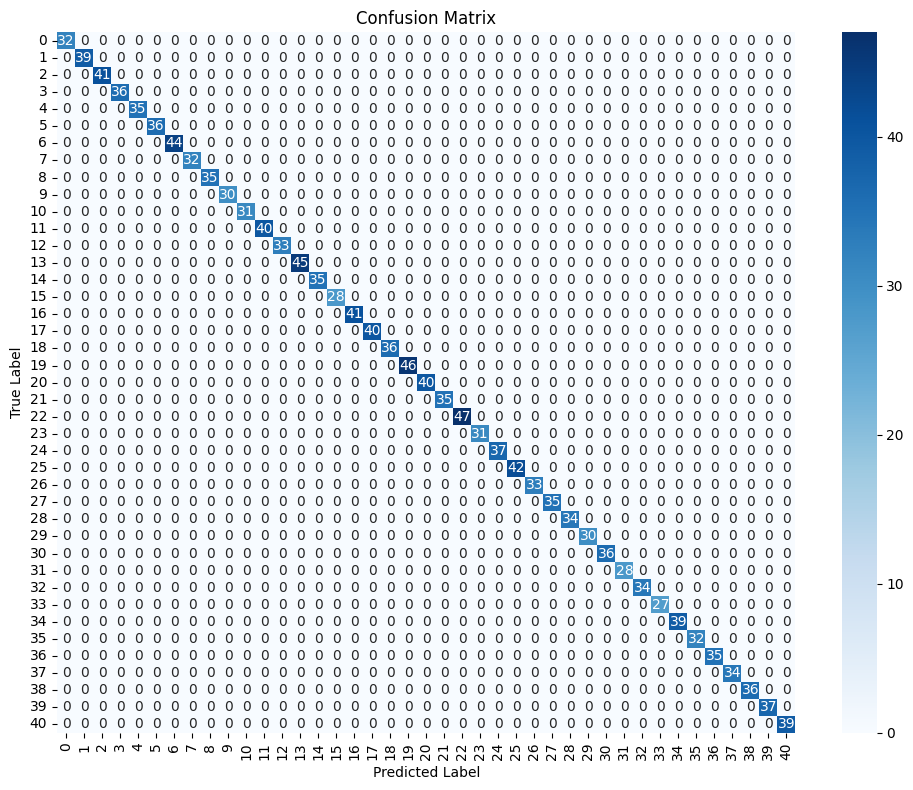

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

y_test_bin shape: (1476, 41)
y_prob shape: (1476, 41)
ROC AUC Score (macro average): 1.00


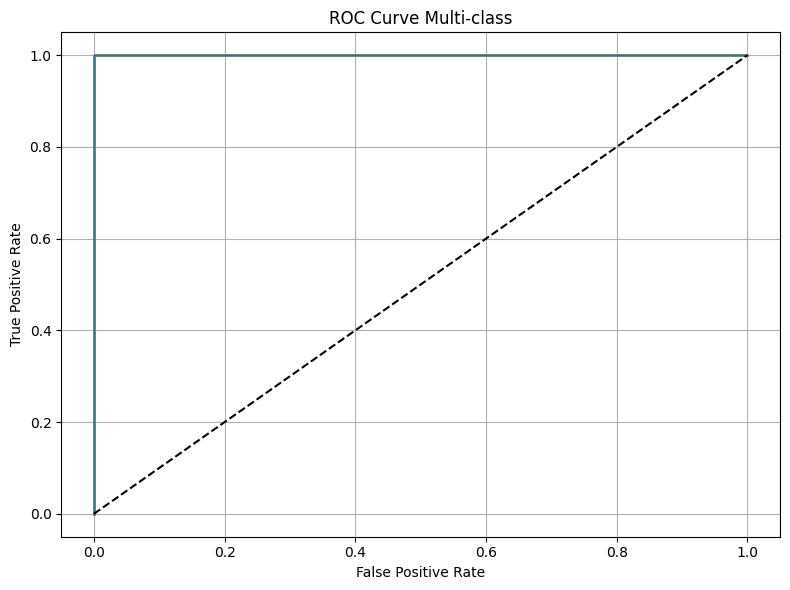

In [57]:
disease_encoder = LabelEncoder()
df['Disease'] = disease_encoder.fit_transform(df['Disease'])
disease_labels = list(disease_encoder.classes_)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_label = np.argmax(y_test, axis=1)
else:
    y_test_label = y_test

y_test_bin = label_binarize(y_test_label, classes=range(len(disease_labels)))
y_prob = np.array(model.predict_proba(X_test))
if y_prob.ndim == 3:
    y_prob = y_prob[:, :, 1]
    y_prob = y_prob.T

print("y_test_bin shape:", y_test_bin.shape)
print("y_prob shape:", y_prob.shape)

roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')
print(f"ROC AUC Score (macro average): {roc_auc:.2f}")


plt.figure(figsize=(8, 6))
for i in range(len(disease_labels)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=1, label=f"{disease_labels[i]} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Multi-class")
plt.grid()
plt.tight_layout()
plt.show()

In [58]:
# print(f'Akurasi: {accuracy:.2f}')
# print('Laporan Klasifikasi:')
# print(class_report)
# print('Matriks Konfusi:')
# print(conf_matrix)
# print(f"ROC AUC Score (RF + KMeans feature): {roc_auc:.2f}")

In [59]:
# from sklearn.preprocessing import MultiLabelBinarizer
# import joblib
# symptom_columns = [col for col in df.columns if 'Symptom' in col]

# symptom_lists = df[symptom_columns].apply(lambda row: [symptom for symptom in row if pd.notnull(symptom) and symptom != 'Unknown'], axis=1)

# mlb = MultiLabelBinarizer()
# mlb.fit(symptom_lists)

# joblib.dump(mlb, 'mlb.joblib')

## DEPLOYMENT

In [60]:
from joblib import dump

dump(model, 'diseaseprediction.joblib')

['diseaseprediction.joblib']

In [61]:
!ngrok config add-authtoken 2wptVOol1C3ftGxJ7p1ZTxtVJEt_6dkrYc4hrMPTfG8DaMgR3

Authtoken saved to configuration file: C:\Users\Mellafesa\AppData\Local/ngrok/ngrok.yml


In [62]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import traceback 

warnings.filterwarnings('ignore')

st.set_page_config(
    page_title="Dashboard Prediksi Penyakit",
    page_icon="🩺",
)
st.title("Aplikasi Prediksi Penyakit Berdasarkan Gejala")
st.write("Masukkan data gejala pasien untuk memprediksi kemungkinan penyakit.")

def process_model_probabilities(prob_output, n_classes, n_samples=None):
    """Process model probability output silently"""
    try:
        if isinstance(prob_output, list):
            if len(prob_output) == 1 and isinstance(prob_output[0], np.ndarray):
                probs = prob_output[0]
            else:
                probs = np.array(prob_output)
        else:
            probs = prob_output
        
        if probs.ndim == 3: 
            if probs.shape[0] == n_classes and probs.shape[2] == 2: 
                probs = probs[:, :, 1].T
            elif probs.shape[1] == 1 and probs.shape[2] == 2: 
                probs = probs[:, 0, 1] 
                if n_samples == 1:
                    probs = probs.reshape(1, -1)    
            elif probs.shape[0] > 0 and probs.shape[2] == n_classes:

                probs = probs[:, -1, :] 
        
        # Standardize to 2D (n_samples, n_classes) or 1D (n_classes,) for single sample
        if probs.ndim == 2 and probs.shape[0] == 1 and n_samples ==1: 
            return probs.flatten()
        elif probs.ndim == 1 and n_samples == 1: 
            return probs
        elif probs.ndim == 2: 
            return probs
        else: 

            return np.ones(n_classes) / n_classes if n_classes > 0 else np.array([])
            
    except Exception as e:
       
        return np.ones(n_classes) / n_classes if n_classes > 0 else np.array([])

def process_model_predictions(pred_output):
    """Process model prediction output silently to ensure 1D array of labels."""
    try:
        if not isinstance(pred_output, np.ndarray): 
            pred_output = np.array(pred_output)

        if pred_output.ndim == 1: 
            return pred_output
        elif pred_output.ndim == 2:
            if pred_output.shape[1] == 1: # (n_samples, 1)
                return pred_output.flatten()
            elif pred_output.shape[1] > 1: 
                return np.argmax(pred_output, axis=1)
        elif np.isscalar(pred_output): 
             return np.array([pred_output])
        
        try:
            return pred_output.flatten() if hasattr(pred_output, 'flatten') else np.array([pred_output])
        except:
            return np.array([]) 
            
    except Exception:
        return np.array([])


# Load Model and Data
@st.cache_resource
def load_resources():
    model_res, df_res, desc_df_res, precaution_df_res, symptom_severity_df_res = None, None, None, None, None
    all_loaded_successfully = True
    try:
        model_res = joblib.load('diseaseprediction.joblib')
        df_res = pd.read_csv('dataset.csv')
        desc_df_res = pd.read_csv('symptom_Description.csv')
        precaution_df_res = pd.read_csv('symptom_precaution.csv')
    except FileNotFoundError:
        st.error("Satu atau lebih file data inti tidak ditemukan (diseaseprediction.joblib, dataset.csv, symptom_Description.csv, symptom_precaution.csv). Aplikasi tidak dapat berjalan.")
        all_loaded_successfully = False
        
    except Exception as e:
        st.error(f"Gagal memuat sumber daya inti: {e}. Aplikasi tidak dapat berjalan.")
        all_loaded_successfully = False

    try:
        symptom_severity_df_res = pd.read_csv('Symptom-severity.csv')
        symptom_severity_df_res.columns = [col.strip().lower() for col in symptom_severity_df_res.columns]
        if 'symptom' not in symptom_severity_df_res.columns or 'weight' not in symptom_severity_df_res.columns:
            st.warning("File 'Symptom-severity.csv' tidak memiliki kolom 'symptom' atau 'weight'. Skor keparahan tidak dapat dihitung/digunakan.")
            symptom_severity_df_res = None # Important to set to None
        else:
            symptom_severity_df_res['symptom'] = symptom_severity_df_res['symptom'].astype(str).str.strip().str.lower().str.replace(' ', '_')
    except FileNotFoundError:
        st.warning("File 'Symptom-severity.csv' tidak ditemukan. Skor keparahan tidak akan dihitung/digunakan oleh model atau ditampilkan.")
        symptom_severity_df_res = None
    except Exception as e:
        st.warning(f"Gagal memuat 'Symptom-severity.csv': {e}. Skor keparahan tidak akan dihitung/digunakan atau ditampilkan.")
        symptom_severity_df_res = None
        
    return model_res, df_res, desc_df_res, precaution_df_res, symptom_severity_df_res, all_loaded_successfully

model, df_orig, desc_df, precaution_df, symptom_severity_df, load_success = load_resources()

if not load_success or model is None or df_orig is None or desc_df is None or precaution_df is None:
    st.error("Pemuatan sumber daya inti gagal. Aplikasi tidak dapat melanjutkan.")
    st.stop() # Stop execution if core files are missing

# --- Data Preprocessing ---
df = df_orig.copy()

cols_to_drop = ['Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)


SYMPTOM_PLACEHOLDER = 'unknown_symptom_placeholder' 
symptom_string_cols = [col for col in df.columns if 'Symptom' in col and col != 'severity_score'] 

symptoms_for_multiselect_set = set()
for col in symptom_string_cols:
    if col in df.columns: 
        df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '_')
        df[col] = df[col].replace(['nan', '', 'none', 'null'], SYMPTOM_PLACEHOLDER) 
        symptoms_for_multiselect_set.update(s for s in df[col].unique() if s != SYMPTOM_PLACEHOLDER)
available_symptoms_for_multiselect = sorted(list(symptoms_for_multiselect_set))


# Hitung severity score
weights_dict = {}
if symptom_severity_df is not None: 
    weights_dict = symptom_severity_df.set_index('symptom')['weight'].to_dict()

def calculate_df_severity(row, symptom_cols_list, current_weights_dict):
    score = 0
    for col_name in symptom_cols_list:
        if col_name in row: 
            symptom_key = row[col_name] 
            if symptom_key != SYMPTOM_PLACEHOLDER:
                score += current_weights_dict.get(symptom_key, 0)
    return score

severity_q1_threshold = 0 
severity_q2_threshold = 0

if symptom_severity_df is not None and weights_dict: 
    df['severity_score'] = df.apply(lambda row: calculate_df_severity(row, symptom_string_cols, weights_dict), axis=1)
    if not df['severity_score'].empty:
        if df['severity_score'].nunique() > 1: 
            severity_q1_threshold = df['severity_score'].quantile(0.33)
            severity_q2_threshold = df['severity_score'].quantile(0.66)
            if severity_q1_threshold == severity_q2_threshold:
                max_score_in_df = df['severity_score'].max()
                if max_score_in_df > 0:
                    severity_q1_threshold = max_score_in_df / 3
                    severity_q2_threshold = 2 * max_score_in_df / 3
                else: 
                     severity_q1_threshold = 1 
                     severity_q2_threshold = 2 
        elif df['severity_score'].nunique() == 1: 
            unique_score = df['severity_score'].iloc[0]
            if unique_score > 0:
                severity_q1_threshold = unique_score / 3
                severity_q2_threshold = 2 * unique_score / 3
            else: 
                severity_q1_threshold = 1
                severity_q2_threshold = 2
        else: 
            severity_q1_threshold = 1 
            severity_q2_threshold = 2
    else: 
        df['severity_score'] = 0 
        st.warning("Kolom 'severity_score' kosong setelah kalkulasi. Menggunakan nilai default.")
        severity_q1_threshold = 1 
        severity_q2_threshold = 2
else: 
    df['severity_score'] = 0 
    st.warning("Data keparahan gejala (Symptom-severity.csv) tidak tersedia atau kosong. 'severity_score' diatur ke 0.")
    severity_q1_threshold = 1 
    severity_q2_threshold = 2

def categorize_severity(score, q1, q2):
    if score <= q1:
        return "Rendah"
    elif score <= q2:
        return "Sedang"
    else:
        return "Tinggi"

# Prepare X (features) and y (target)
symptom_cols_to_encode = symptom_string_cols.copy()

all_symptom_values_for_encoder = [SYMPTOM_PLACEHOLDER]
for col in symptom_cols_to_encode:
    if col in df.columns:
        all_symptom_values_for_encoder.extend(df[col].unique())
unique_symptom_encoder_values = sorted(list(set(all_symptom_values_for_encoder)))

symptom_encoder = LabelEncoder()
symptom_encoder.fit(unique_symptom_encoder_values)
symptom_mapping = dict(zip(symptom_encoder.classes_, symptom_encoder.transform(symptom_encoder.classes_)))


if 'Disease' not in df.columns:
    st.error("Kolom target 'Disease' tidak ditemukan dalam dataset. Tidak dapat melanjutkan.")
    st.stop()
    
X = df.drop('Disease', axis=1).copy() 
for col in symptom_cols_to_encode:
    if col in X.columns:
        X[col] = X[col].map(symptom_mapping).fillna(symptom_mapping.get(SYMPTOM_PLACEHOLDER, 0))


y_series = df['Disease']
disease_encoder = LabelEncoder()
y = disease_encoder.fit_transform(y_series)
n_classes = len(disease_encoder.classes_)
if n_classes == 0:
    st.error("Tidak ada kelas penyakit yang terdeteksi setelah encoding. Periksa kolom 'Disease' Anda.")
    st.stop()


# --- Feature Scaling and Clustering ---
expected_model_features_before_cluster = list(X.columns) 

scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X[expected_model_features_before_cluster])
except ValueError as e_scale:
    st.error(f"Error saat scaling fitur: {e_scale}. Ini bisa terjadi jika ada nilai non-numerik atau NaN yang tersisa di X.")
    st.error(f"Kolom di X sebelum scaling: {X.columns.tolist()}")
    st.error(f"Contoh data X:\n{X.head()}")
    st.stop()


# Clustering
clusters = np.zeros(X_scaled.shape[0], dtype=int) 
kmeans_model = None 
if X_scaled.shape[0] > 0:
    try:
        n_cluster_val = min(3, n_classes, X_scaled.shape[0]) 
        n_cluster_val = max(1, n_cluster_val)

        kmeans_model = KMeans(n_clusters=n_cluster_val, random_state=42, n_init='auto')
        clusters = kmeans_model.fit_predict(X_scaled)
    except ValueError as e_kmeans: 
        st.warning(f"Gagal melakukan K-Means clustering ({e_kmeans}). Menggunakan klaster default (0).")
        clusters = np.zeros(X_scaled.shape[0], dtype=int) 
else:
    st.warning("Tidak ada data untuk K-Means clustering.")


X_final = pd.DataFrame(X_scaled, columns=expected_model_features_before_cluster)
X_final['cluster'] = clusters 

# Train-test split
if X_final.empty or len(y) == 0:
    st.warning("Tidak cukup data untuk train-test split dan evaluasi model.")
    X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), np.array([]), np.array([])
else:
    try:
        stratify_y = y if len(np.unique(y)) > 1 else None
        X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=stratify_y)
    except ValueError as e_split:
        st.warning(f"Gagal melakukan stratified split ({e_split}). Melakukan split standar.")
        X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)


st.markdown("---")
st.subheader("🧪 Evaluasi Model Penyakit")

if X_test.empty or len(y_test) == 0:
    st.info("Evaluasi model tidak dapat dilakukan karena tidak ada data test yang cukup.")
else:
    try:
        pred_raw = model.predict(X_test) 
        y_pred = process_model_predictions(pred_raw)
        
        if not isinstance(y_pred, np.ndarray) or y_pred.ndim != 1 or (len(y_test) > 0 and len(y_pred) != len(y_test)):
             st.error(f"Output y_pred tidak valid. Shape: {getattr(y_pred, 'shape', 'N/A')}")
             y_pred = np.array([-1] * len(y_test)) if len(y_test) > 0 else np.array([]) 

        prob_raw = model.predict_proba(X_test)
        y_prob = process_model_probabilities(prob_raw, n_classes, len(X_test))
        
        accuracy = accuracy_score(y_test, y_pred) if len(y_pred) == len(y_test) and len(y_test) > 0 else 0.0
       
        target_names_str = [str(cls_name) for cls_name in disease_encoder.classes_]
        report = classification_report(y_test, y_pred, target_names=target_names_str, zero_division=0) if len(y_pred) == len(y_test) and len(y_test) > 0 else "Laporan tidak tersedia."
        
        cm = confusion_matrix(y_test, y_pred, labels=range(n_classes)) if len(y_pred) == len(y_test) and len(y_test) > 0 else np.array([[0]*n_classes]*n_classes)
        
        auc_score = 0.0
        can_calc_auc = isinstance(y_prob, np.ndarray) and y_prob.ndim == 2 and y_prob.shape[0] == len(y_test) and y_prob.shape[1] == n_classes and len(np.unique(y_test)) > 1

        if can_calc_auc:
            try:
                y_bin = label_binarize(y_test, classes=range(n_classes))
                if n_classes == 2: 
                    auc_score = roc_auc_score(y_test, y_prob[:, 1]) 
                elif y_bin.shape[1] == n_classes : 
                    auc_score = roc_auc_score(y_bin, y_prob, multi_class='ovr', average='macro')
            except ValueError: 
                pass 
            except Exception:
                pass 
        
        col1, col2, col3, col4 = st.columns(4)
        with col1: st.metric("Accuracy", f"{accuracy:.2%}")
        with col2: st.metric("Classes", f"{n_classes}")
        with col3: st.metric("Test Samples", f"{len(y_test)}")
        with col4: st.metric("ROC AUC", f"{auc_score:.3f}" if auc_score > 0 else "N/A")
        
        viz_option = st.selectbox("Pilih visualisasi:", ["Tidak Ada", "ROC Curve", "Confusion Matrix", "Classification Report"])
        
        if viz_option == "ROC Curve" and can_calc_auc and auc_score > 0:
            st.subheader("ROC Curves")
            fig_roc, ax_roc = plt.subplots(figsize=(10, 8))
            y_bin_roc = label_binarize(y_test, classes=range(n_classes))
            
            if n_classes == 2:
                fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
                ax_roc.plot(fpr, tpr, label=f'{target_names_str[1]} (AUC = {auc_score:.2f})')
            elif y_bin_roc.shape[1] == n_classes :
                for i in range(n_classes):
                    if i < len(target_names_str):
                        try:
                            fpr, tpr, _ = roc_curve(y_bin_roc[:, i], y_prob[:, i])
                            auc_val_class = roc_auc_score(y_bin_roc[:, i], y_prob[:, i])
                            ax_roc.plot(fpr, tpr, label=f'{target_names_str[i]} (AUC = {auc_val_class:.2f})')
                        except ValueError: pass 
            
            ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
            ax_roc.set_xlabel('False Positive Rate'); ax_roc.set_ylabel('True Positive Rate')
            ax_roc.set_title('ROC Curves (OVR)'); 
            if n_classes > 1 : ax_roc.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax_roc.grid(True, alpha=0.3); st.pyplot(fig_roc); plt.close(fig_roc)
        
        elif viz_option == "Confusion Matrix":
            st.subheader("Confusion Matrix")
            fig_cm, ax_cm = plt.subplots(figsize=(max(8, n_classes*0.6), max(6, n_classes*0.5)))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm, 
                        xticklabels=target_names_str, yticklabels=target_names_str)
            ax_cm.set_title('Confusion Matrix'); ax_cm.set_xlabel('Predicted'); ax_cm.set_ylabel('Actual')
            plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
            plt.tight_layout(); st.pyplot(fig_cm); plt.close(fig_cm)
        
        elif viz_option == "Classification Report":
            st.subheader("Classification Report"); st.text_area("Laporan:",report, height=max(300, n_classes*25) )

    except Exception as e_eval:
        st.error(f"Gagal melakukan evaluasi model: {e_eval}")
        st.error(traceback.format_exc())


st.markdown("---")
st.subheader("🔍 Prediksi Penyakit")

with st.form("prediction_form"):
    selected_symptoms_raw = st.multiselect( 
        "Pilih gejala yang dialami:",
        options=available_symptoms_for_multiselect, 
        help="Pilih satu atau lebih gejala dari daftar"
    )
    predict_btn = st.form_submit_button("🧠 Prediksi Penyakit", use_container_width=True)

if predict_btn:
    if selected_symptoms_raw:
        try:
            user_input_features_dict = {} 
            
          
            for i, col_name in enumerate(symptom_string_cols): 
                if col_name in X_final.columns: 
                    if i < len(selected_symptoms_raw):
                    
                        user_input_features_dict[col_name] = symptom_mapping.get(selected_symptoms_raw[i], symptom_mapping[SYMPTOM_PLACEHOLDER])
                    else:
                        user_input_features_dict[col_name] = symptom_mapping[SYMPTOM_PLACEHOLDER]
            
        
            current_user_severity_score = 0
            if symptom_severity_df is not None and weights_dict: 
                for symptom_name in selected_symptoms_raw: 
                    current_user_severity_score += weights_dict.get(symptom_name, 0)
            user_input_features_dict['severity_score'] = current_user_severity_score
            
       
            user_df_list = []
            for col_feature_name in expected_model_features_before_cluster:
                
                default_val = symptom_mapping.get(SYMPTOM_PLACEHOLDER, 0) if 'Symptom' in col_feature_name else 0
                user_df_list.append(user_input_features_dict.get(col_feature_name, default_val))

            user_df_pre_scale = pd.DataFrame([user_df_list], columns=expected_model_features_before_cluster)
            
    
            user_scaled_values = scaler.transform(user_df_pre_scale)
            
            user_cluster = 0 
            if kmeans_model is not None: 
                try:
                    user_cluster = kmeans_model.predict(user_scaled_values)[0]
                except Exception: 
                    user_cluster = 0 
            
            user_features_df_final = pd.DataFrame(user_scaled_values, columns=expected_model_features_before_cluster)
            user_features_df_final['cluster'] = user_cluster
            
            user_features_for_model = user_features_df_final[X_final.columns] 
            
            pred_raw_user = model.predict(user_features_for_model)
            prob_raw_user = model.predict_proba(user_features_for_model)
            probabilities = process_model_probabilities(prob_raw_user, n_classes, 1) 
            
            if probabilities is not None and len(probabilities) == n_classes:
                predicted_idx = np.argmax(probabilities)
                confidence = probabilities[predicted_idx]
                disease_name = disease_encoder.inverse_transform([predicted_idx])[0]
                
                st.success("### 📋 Hasil Prediksi")
                col1_res, col2_res = st.columns([2,1]) 
                with col1_res: st.markdown(f"**Penyakit:** <span style='font-size: 1.2em; color: #28a745;'>**{str(disease_name).strip()}**</span>", unsafe_allow_html=True)
                with col2_res: st.markdown(f"**Keyakinan:** <span style='font-size: 1.2em;'>{confidence:.1%}</span>", unsafe_allow_html=True)
                st.markdown("---")

                # Display Description
                if desc_df is not None:
                    desc_row = desc_df[desc_df['Disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not desc_row.empty: st.info(f"**📖 Deskripsi:** {desc_row['Description'].values[0]}")
                    else: st.caption(f"Deskripsi tidak tersedia untuk '{str(disease_name).strip()}'.")

                # Display Precautions
                if precaution_df is not None:
                    precaution_row = precaution_df[precaution_df['Disease'].str.strip().str.lower() == str(disease_name).strip().lower()]
                    if not precaution_row.empty:
                        precautions = [str(p).strip() for p in precaution_row.iloc[0, 1:].values if pd.notna(p) and str(p).strip().lower() not in ['nan', '']]
                        if precautions:
                            st.warning("**🛡️ Tindakan Pencegahan & Saran:**")
                            for i, p_text in enumerate(precautions, 1): st.write(f"{i}. {p_text}")
                        else: st.caption(f"Tindakan pencegahan tidak spesifik atau tidak tersedia untuk '{str(disease_name).strip()}'.")
                    else: st.caption(f"Informasi tindakan pencegahan tidak ditemukan untuk '{str(disease_name).strip()}'.")
                
                st.markdown("---") 
                
                # Top 5 Diagnoses
                if len(probabilities) > 1 and n_classes > 1:
                    st.markdown("### 📊 Top 5 Kemungkinan Diagnosis")
                    top_indices = np.argsort(probabilities)[::-1][:min(5, n_classes)] # Show up to 5 or n_classes
                    top_diseases = disease_encoder.inverse_transform(top_indices)
                    top_probs = probabilities[top_indices]
                    
                    results_data = {'Penyakit': [str(d).strip() for d in top_diseases], 'Probabilitas': top_probs}
                    results_df = pd.DataFrame(results_data)
                    
                    chart_data = results_df.set_index('Penyakit')
                    st.bar_chart(chart_data, height=300)
                    st.dataframe(results_df.style.format({'Probabilitas': '{:.1%}'}), use_container_width=True, hide_index=True)

                # Display user's calculated severity score and category
                if symptom_severity_df is not None and weights_dict: 
                    severity_category = categorize_severity(current_user_severity_score, severity_q1_threshold, severity_q2_threshold)
                    st.info(f"ℹ️ **Total Skor Keparahan Gejala (berdasarkan input):** {current_user_severity_score} (Kategori: **{severity_category}**).\n\nAmbang batas kategori: Rendah ≤ {severity_q1_threshold:.1f}, Sedang ≤ {severity_q2_threshold:.1f}, Tinggi > {severity_q2_threshold:.1f}. Skor ini adalah salah satu dari berbagai faktor yang dipertimbangkan model.")
                else:
                    st.info("ℹ️ Skor keparahan gejala tidak dapat dihitung (data 'Symptom-severity.csv' tidak tersedia atau kosong), sehingga kategori tidak dapat ditentukan.")

            else:
                st.error("Tidak dapat menghitung probabilitas prediksi. Model mungkin tidak mengembalikan output yang diharapkan atau jumlah kelas tidak sesuai.")
        
        except KeyError as e_key:
            st.error(f"Terjadi kesalahan pemetaan fitur (KeyError): '{e_key}'. Ini mungkin bug internal atau ketidaksesuaian data/kolom.")
            st.error(traceback.format_exc())
        except ValueError as e_val:
            st.error(f"Terjadi kesalahan dalam pemrosesan input atau prediksi (ValueError): {e_val}.")
            st.error(traceback.format_exc())
        except Exception as e_pred:
            st.error(f"Terjadi kesalahan umum saat memproses prediksi: {e_pred}")
            st.error(traceback.format_exc())
    
    else:
        st.warning("⚠️ Silakan pilih minimal satu gejala untuk melakukan prediksi.")

st.markdown("---")
st.caption("⚕️ *Aplikasi ini untuk tujuan informasi dan edukasi saja. Selalu konsultasikan dengan profesional medis atau dokter untuk diagnosis dan perawatan yang akurat.*")

Overwriting app.py


In [63]:
from pyngrok import ngrok
import threading
import time
import os

In [64]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8502")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8502)
print(f"Streamlit app is live at: {public_url}")


t=2025-06-02T13:14:56+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
t=2025-06-02T13:14:56+0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration fil

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.